<h1><center> Исследование европейских горнолыжных курортов </center></h1>

---

В нашем распоряжении - датасет с информацией о горнолыжных курортах Италии, Австрии, Франции, Болгарии, Андорры и Финляндии.

Заказчик работы - архитектурное бюро, планирующее создать отель в одной из указанных стран. **На основе выводов исследования компания примет решение - какие изменения стоит внести в находящийся на стадии обсуждения проект отеля, а также какую страну выбрать**. Для этого нас просят составить описание "типичного" европейского отеля на основе имеющихся данных. Помимо этого, заказчик хочет узнать об инсайтах и особенностях, если они найдутся.

Цель исследования - **определить параметры среднего горнолыжного отеля**.

Мы подготовим и исследуем данные - и создадим общий портрет среднего отеля и также по портрету отелей трёх классов в зависимости от стоимости для каждой страны.

Так начнём же.

---
### <center> Содержание </center>

- 1. [Предобработка данных](#data_prep)
    - 1.1 [Первичное ознакомление с данными](#firstlook)
    - 1.2 [Переименование столбцов](#сolrenaming)
    - 1.3.[Обработка пропусков](#goodbyenans)
    - 1.4 [Замена типов данных](#typeconversion)
    - 1.5 [Обработка дубликатов](#dropduplicates)
    - [Выводы](#data_prep_conclusion)


- 2. [Исследовательский анализ данных](#eda)
    - 2.1 [country](#eda_country)
    - 2.2 [resort](#eda_resort)
    - 2.3 [price_per_week](#eda_price_per_week)
    - 2.4 [meters_from_lift](#eda_meters_from_lift)
    - 2.5 [altitude_m](#eda_altitude_m)
    - 2.6 [total_piste_km](#eda_total_piste_km)
    - 2.7 [total_lifts](#eda_total_lifts)
    - 2.8 [столбцы с типами подъёмников](#eda_gondolas)
    - 2.9 [столбцы с типами трасс](#eda_blues)
    - 2.10 [sleeps](#eda_sleeps)
    - 2.11 [столбцы с количеством осадков](#eda_snow)
    - 2.12 [построение матрицы корреляций](#eda_corr)
    - [Выводы](#eda_conclusion)
    
        
- 3. [Составление портретов отелей](#portraits)
    - 3.1 [Параметры среднего горнолыжного отеля](#port_mean_hotel)
    - 3.2 [Параметры отелей бюджетного, среднего и премиум классов без разделения по странам](#port_mean_diff_classes)
    - 3.3 [Параметры бюджетных отелей в разных странах](#port_countries_cheap)
    - 3.4 [Параметры отелей среднего класса в разных странах](#port_countries_medium)
    - 3.5 [Параметры отелей премиум класса в разных странах](#port_countries_premium)
    - 3.6 [Сравнение "среднего отеля" и "отеля среднего класса"](#port_mean_medium_comparison)
    - [Выводы](#port_conclusion)
    

- 4. [Проверка гипотез](#hypothesis)


- [Выводы исследования](#conclusion)

---
### <center> Описание данных </center>

Датасет содержит информацию о европейских горнолыжных курортах и отелях, которые на них расположены. Имеется такая информация, как недельная стоимость проживания в отеле, количество подъёмников на курорте, общее число трасс и количество осадков на каждом курорте за 2020 год.

Среди прочих, в таблице находятся следующие столбцы:
- Unnamed: 0: индексы, без пропущенных значений от 0 до 406, со средним 203 и стд.отклонением 117.63;
- country: страна, в которой расположен отель. Значения в этом столбце не имеют пропусков, и включают шесть уникальных стран: austria, italy, france, andorra, finland, bulgaria. Австрия - наиболее частая страна со 169 отелями, в то время как Болгария - наименее частая, с указанием лишь 11 отелей.
- resort: курорт, на кором расположен отель. Значения в этом столбце не имеют пропусков, и включают 92 уникальных курорта. Zell-am-See и Obergurgl - наиболее частые курорты с 15 отелями в каждом, а Les Arcs 2000 и Ellmau - наиболее редкие, каждый с одним отелем.
- hotel: название отеля. Значения в этом столбце не имеют пропусков, и содержат 396 уникальных отеля.
- price (£): цена за неделю проживания в отеле в фунтах стерлингов.
- distance_from_lift_(m): расстояние от отеля до ближайшего подъёмника, в метрах.
- altitude (m): высота отеля над уровнем моря, в метрах.

<a id='data_prep'> </a>

<hr style='border: 2px solid #eeeeee'>

## <center> 1. Предобработка данных </center>

Импортируем необходимые библиотеки и загрузим датасет:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from scipy import stats as st
from IPython.display import display_html
pd.set_option('max_colwidth', 130)
pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('C:\\Users\\Саша\\Practicum\\Q\\Датасеты\\ski_hotels.csv', engine='python')

<a id='firstlook'> </a>

---
> ### 1.1 Первичное ознакомление с данными

Посмотрим на информацию о датасете, на числовое описание данных, а также на некоторые значения:

In [3]:
#print('\033[1m' 'Типы данных:' '\033[0m')
#df.info()

#for i in df:
 #   print('\033[1m' 'Столбец', i, '\033[0m')
  #  print(df[i].unique())
   # print('')
    
#display(round(df.describe(), 2))

#print('\033[1m' 'Количество пропусков в столбцах:' '\033[0m')
#print(df.isna().sum())

print('\033[1m' 'Количество явных дубликатов:', df.duplicated().sum(), '\033[0m')

#df.head()
#df.tail()

Количество явных дубликатов: 0 


---
**Выводы ознакомления с данными** таковы:
- Датасет содержит **407 строк, 24 столбца**;
- Типы данных - int, float и object;
- **Пропуски** есть в столбцах altitude, distance_from_lift_(m), sleeps и в столбцах с осадками; 
- **Явные дубликаты отсутствуют**;
- Некоторые столбцы стоит переименовать, а некоторые не понадобятся для исследования.

<a id='сolrenaming'> </a>

---
> ### 1.2 Переименование столбцов

Начнём предобработку именно с этого этапа, чтобы нам было удобнее работать с данными. Взглянем на названия:

In [4]:
print('\n'.join(df.columns))

Unnamed: 0
country
resort
hotel
price (ВЈ)
distance_from_lift_(m)
altitude (m)
totalPiste (km)
totalLifts
gondolas
chairlifts
draglifts
blues
reds
blacks
totalRuns
link
sleeps
decSnowLow2020(cm)
decSnowHigh2020(cm)
janSnowLow2020(cm)
janSnowHigh2020(cm)
febSnowLow2020(cm)
febSnowHigh2020(cm)


Столбец **Unnamed: 0** указан в описании данных как индекс, поэтому он нам не пригодится, так же как и столбец **link**.
Название **price** заменим на price_per_week, впишем величины m, cm и km в названия соответствующих столбцов, изменим "верблюжий" **регистр** на "змеиный" где потребуется, и уберём год в названиях столбцов с показаниями выпадения снега в последних 6 столбцах:

In [5]:
df.drop(['Unnamed: 0', 'link'], axis=1, inplace=True)
df = df.rename(columns={'price (ВЈ)':'price_per_week', 'distance_from_lift_(m)':'meters_from_lift','altitude (m)':'altitude_m', \
                        'totalPiste (km)':'total_piste_km', 'totalLifts':'total_lifts', 'totalRuns':'total_runs', \
                        'decSnowLow2020(cm)':'dec_snow_low_cm', 'decSnowHigh2020(cm)':'dec_snow_high_cm', \
                        'janSnowLow2020(cm)':'jan_snow_low_cm', 'janSnowHigh2020(cm)':'jan_snow_high_cm', \
                        'febSnowLow2020(cm)':'feb_snow_low_cm', 'febSnowHigh2020(cm)':'feb_snow_high_cm'} )

<a id='goodbyenans'> </a>

---
> ### 1.3 Обработка пропусков

Ознакомление с данными показало **наличие пропусков в столбце altitude** - их всего три, они могли быть вызваны человеческим фактором (их забыли указать), но причиной мог быть и технический сбой. Взглянем на них:

In [6]:
df[df.isna().any(1)]

,country,resort,hotel,price_per_week,meters_from_lift,altitude_m,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs,sleeps,dec_snow_low_cm,dec_snow_high_cm,jan_snow_low_cm,jan_snow_high_cm,feb_snow_low_cm,feb_snow_high_cm
19,italy,sauze-d-oulx,hotel-clotes,692,100,NaN,400,89,0,35,54,31.0,97.0,32.0,160.0,unknown,150,220,35,300,96,280
25,andorra,pas-de-la-casa,hotel-grand-pas,701,unknown,NaN,193,63,4,28,26,40.0,37.0,23.0,100.0,unknown,15,40,80,165,52,140
29,italy,bardonecchia,hotel-ca-fiore,712,unknown,NaN,140,23,0,9,14,17.0,24.0,1.0,42.0,74,70,170,60,200,47,177


Выглядит логичным заполнить их медианами для курортов, на которых они находятся:

In [7]:
df['altitude_m'] = df['altitude_m'].fillna( df.groupby('resort')['altitude_m'].transform('median') )
df['altitude_m'].isna().sum()

0

Также мы видели пропуски и в **meters_from_lift** и **sleeps** - там указано как "Unknown", причем в обоих столбцах довольно важная для исследования информация (расстояние до подъёмников и количество спальных мест в отеле). Проверим, сколько их:

In [8]:
meters_from_lift_percent = len( df[df['meters_from_lift'] == 'unknown'] ) / len(df)
print('Количество пропусков в meters_from_lift:', len( df[df['meters_from_lift'] == 'unknown'] ))
print(f'Доля пропусков от общего числа значений: {meters_from_lift_percent:.2%}')

print('')

sleeps_percent = len( df[df['sleeps'] == 'unknown'] ) / len(df)
print('Количество пропусков в sleeps:', len( df[df['sleeps'] == 'unknown'] ))
print(f'Доля пропусков от общего числа значений: {sleeps_percent:.2%}')

Количество пропусков в meters_from_lift: 192
Доля пропусков от общего числа значений: 47.17%

Количество пропусков в sleeps: 96
Доля пропусков от общего числа значений: 23.59%


В обоих случаях **количество пропусков велико**, хотя в meters_from_lift их вдвое больше, чем в sleeps. Учитывая, что сейчас эти столбцы - в формате object - мы **заменим unknown на нули**, а затем сменим тип, и нули заменим медианами с группировкой по странам:

In [9]:
df.loc[df['meters_from_lift'] == 'unknown', 'meters_from_lift'] = 0
df.loc[df['sleeps'] == 'unknown', 'sleeps'] = 0

Заменим тип object на int - и **заменим нули медианами стран**:

In [10]:
df['meters_from_lift'] = df['meters_from_lift'].astype('int64')
df.loc[df['meters_from_lift'] == 0, 'meters_from_lift'] = df.groupby('country')['meters_from_lift'].transform('median')

df['sleeps'] = df['sleeps'].astype('int64')
df.loc[df['sleeps'] == 0, 'sleeps'] = df.groupby('country')['sleeps'].transform('median')

Посмотрим как прошла замена:

In [11]:
print('Количество пропусков в столбце meters_from_lift:', len(df[df['meters_from_lift'] == 0]))
print('Количество пропусков в столбце sleeps:', len(df[df['sleeps'] == 0]))

Количество пропусков в столбце meters_from_lift: 158
Количество пропусков в столбце sleeps: 0


В meters_from_lift осталось 158 пропусков - скорее всего причина в том, что пропусков так много, что медиана для некоторых стран равна нулю. Тогда **оставшиеся пропуски в meters_from_lift заменим средними для стран**:

In [12]:
df.loc[df['meters_from_lift'] == 0, 'meters_from_lift'] = df.groupby('country')['meters_from_lift'].transform('mean')

In [13]:
print('Количество пропусков в столбце meters_from_lift:', len(df[df['meters_from_lift'] == 0]))
print('Количество пропусков в столбце sleeps:', len(df[df['sleeps'] == 0]))

Количество пропусков в столбце meters_from_lift: 0
Количество пропусков в столбце sleeps: 0


Порядок! Теперь проделаем такую же работу для столбцов с осадками:

In [14]:
df_last_six = ['dec_snow_low_cm', 'dec_snow_high_cm', 'jan_snow_low_cm', \
               'jan_snow_high_cm', 'feb_snow_low_cm', 'feb_snow_high_cm']

for i in df_last_six:
    print('Количество пропусков в столбце', i, '-', len( df[df[i] == 'unknown'] ))

Количество пропусков в столбце dec_snow_low_cm - 56
Количество пропусков в столбце dec_snow_high_cm - 56
Количество пропусков в столбце jan_snow_low_cm - 56
Количество пропусков в столбце jan_snow_high_cm - 56
Количество пропусков в столбце feb_snow_low_cm - 56
Количество пропусков в столбце feb_snow_high_cm - 56


Интересно - **количество пропусков совпадает во всех столбцах**. Доля пропусков не так значительна, как в столбцах meters_from_lift и sleeps. Столбцов много, поэтому определим функцию, которая будет подставлять столбец в переназначение "unknown" на нули, а затем циклу передадим назначенный на прошлом шаге список столбцов:

In [15]:
def hello_nan(stolbets):
    df.loc[df[stolbets] == 'unknown', stolbets] = 0

for i in df_last_six:
    hello_nan(i)

Так же, циклом, **заменим тип значений** в столбцах:

In [16]:
for i in df_last_six:
    df[i] = df[i].astype('float64')

И заменим нули средними показателями стран:

In [17]:
for i in df_last_six:
    df.loc[df[i] == 0, i] = df.groupby('country')[i].transform('mean')

Посмотрим, как всё прошло:

In [18]:
for i in df_last_six:
    print('Количество пропусков в столбце', i, '-', len( df[df[i] == 0] ))

Количество пропусков в столбце dec_snow_low_cm - 11
Количество пропусков в столбце dec_snow_high_cm - 0
Количество пропусков в столбце jan_snow_low_cm - 0
Количество пропусков в столбце jan_snow_high_cm - 0
Количество пропусков в столбце feb_snow_low_cm - 0
Количество пропусков в столбце feb_snow_high_cm - 0


В столбце dec_snow_low_cm осталось 11 нулей - возможно там не выпадает снег в декабре, проверим:

In [19]:
print(''.join(df[df['dec_snow_low_cm'] == 0]['country'].unique()))

bulgaria


Действительно, **в Болгарии в декабре без осадков**. Продолжим работу.

<a id='typeconversion'> </a>

---
> ### 1.4 Замена типов данных и отрицательных значений

Ознакомление с данными показало необходимость заменить типы в некоторых столбцах, например, в столбце **altitude_m** ни к чему float, схожая ситуация и в столбцах **blues, reds, blacks, и total_runs** - исправим:

In [20]:
df[['altitude_m', 'blues', 'reds', 'blacks', 'total_runs']] = \
df[['altitude_m', 'blues', 'reds', 'blacks', 'total_runs']].astype('int64')

Взглянем на результат:

In [21]:
df.dtypes

country              object
resort               object
hotel                object
price_per_week        int64
meters_from_lift    float64
altitude_m            int64
total_piste_km        int64
total_lifts           int64
gondolas              int64
chairlifts            int64
draglifts             int64
blues                 int64
reds                  int64
blacks                int64
total_runs            int64
sleeps                int64
dec_snow_low_cm     float64
dec_snow_high_cm    float64
jan_snow_low_cm     float64
jan_snow_high_cm    float64
feb_snow_low_cm     float64
feb_snow_high_cm    float64
dtype: object

<a id='dropduplicates'> </a>

---
> ### 1.5 Обработка дубликатов

Мы уже видели, что явные дубликаты отсутствуют, но могут быть и неявные. Для их проверки **приведём все значения столбцов country, resort и hotel к нижнему регистру**, и ещё раз вызовем duplicated() :

In [22]:
str_lower = ['country', 'resort', 'hotel']

for i in str_lower:
    df[i] = df[i].str.lower()

In [23]:
df.duplicated().sum()

0

Хорошо. Теперь **попробуем поочерёдно убрать столбцы с категориальными данными** - и проверить наличие дубликатов снова. Для этого передадим список столбцов, уже сохранённый в переменной str_lower:

In [24]:
for i in str_lower:
    df_one_x = df.drop(i, axis=1, inplace=False)
    print('Количество дубликатов при отсутствии столбца', i, '-', df_one_x.duplicated().sum())

Количество дубликатов при отсутствии столбца country - 0
Количество дубликатов при отсутствии столбца resort - 0
Количество дубликатов при отсутствии столбца hotel - 1


Вот и **один неявный дубликат**, посмотрим на него:

In [25]:
df_one_x[ df_one_x.duplicated() ]

,country,resort,price_per_week,meters_from_lift,altitude_m,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs,sleeps,dec_snow_low_cm,dec_snow_high_cm,jan_snow_low_cm,jan_snow_high_cm,feb_snow_low_cm,feb_snow_high_cm
194,italy,cortina,1007,174.904762,1224,140,47,5,29,13,52,18,8,78,70,30.0,130.0,30.0,130.0,30.0,130.0


In [26]:
df[df['resort'] == 'cortina']

,country,resort,hotel,price_per_week,meters_from_lift,altitude_m,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs,sleeps,dec_snow_low_cm,dec_snow_high_cm,jan_snow_low_cm,jan_snow_high_cm,feb_snow_low_cm,feb_snow_high_cm
191,italy,cortina,hotel-serena,1007,174.904762,1224,140,47,5,29,13,52,18,8,78,70,30.0,130.0,30.0,130.0,30.0,130.0
194,italy,cortina,panda-hotel,1007,174.904762,1224,140,47,5,29,13,52,18,8,78,70,30.0,130.0,30.0,130.0,30.0,130.0


Можно было бы предположить, что это просто два отеля, стоящих рядом, но у них **в точности совпадает даже цена** - выглядит маловероятно. Продолжим без panda (у нас уже есть pandas) :

In [27]:
df.drop( [194], axis=0, inplace=True )
df = df.reset_index(drop=True)

<a id='data_prep_conclusion'> </a>

---
> **Выводы этапа предобработки данных**

Мы ознакомились с данными, а также исправили некоторые моменты, а именно:
- переименовали столбцы;
- обработали **пропуски**;
- изменили **тип данных** в некоторых столбцах;
- убрали один **неявный дубликат**.

Перейдём к следующему этапу работы.

<a id='eda'> </a>

<hr style='border: 2px solid #eeeeee'>

## <center> 2. Исследовательский анализ данных </center>

Нам предстоит детально изучить имеющиеся данные, для этого  мы ознакомимся с содержимым столбцов, посмотрим на графики, числовые описания данных.

<a id='eda_country'> </a>

---
> ### 2.1 country

Посмотрим, в какой стране больше всего курортов:

In [28]:
ctrs = df.groupby('country').agg({'hotel':'count'}).sort_values(by='hotel', ascending=False).reset_index()
ctrs['ratio'] = ctrs['hotel'] / ctrs['hotel'].sum()
ctrs.style.format('{0:.2%}', subset='ratio').hide_index()

country,hotel,ratio
austria,169,41.63%
italy,104,25.62%
france,77,18.97%
andorra,29,7.14%
finland,16,3.94%
bulgaria,11,2.71%


Весьма простой и понятный вывод. Но разве он сравнится с наглядным графиком?

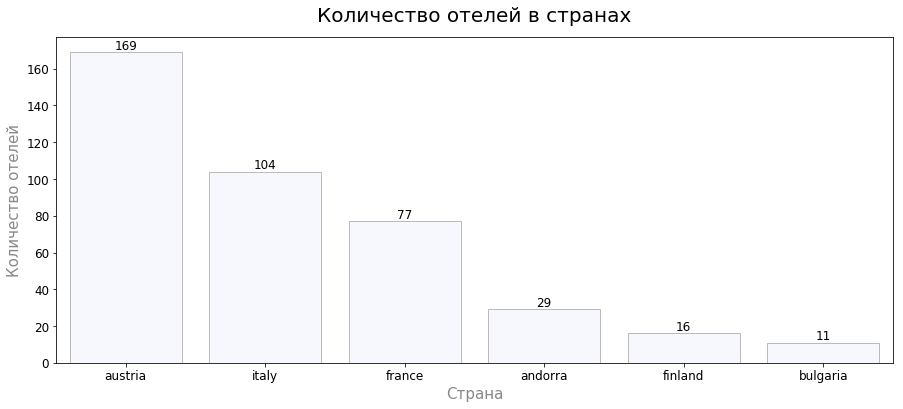

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(data=ctrs, x='country', y='hotel', edgecolor='#bbbbbb', color='#f6f6ff')
for a, b in enumerate(ctrs['hotel'].values):
    plt.text(a, b, int(b), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})
plt.title('Количество отелей в странах', fontsize=20, pad=15)
plt.xlabel('Страна', fontsize=15, color='#888888')
plt.ylabel('Количество отелей', fontsize=15, color='#888888')
plt.tick_params(axis='both', labelsize=12);

В Австрии в 10 раз больше отелей, чем, например, в Финляндии. А в Италии - в три раза больше, чем в Андорре. При таких различиях несколько неправильно составлять именно **общий "портрет" отеля - тем не менее, запрос заказчика именно такой**. Но дополнительно на нужном этапе мы составим свою картину отеля для каждой страны.

<a id='eda_resort'> </a>

---
> ### 2.2 resort

Теперь ознакомимся с курортами и посмотрим, на каких расположено **больше всего отелей**:

In [30]:
resorts = df.groupby(['resort', 'country']).agg({'hotel':'count'}).sort_values(by='hotel', ascending=False).reset_index()
resorts.head(20)

,resort,country,hotel
0,zell-am-see,austria,15
1,obergurgl,austria,15
2,mayrhofen,austria,13
3,selva-val-gardena,italy,12
4,st-anton,austria,12
5,passo-tonale,italy,11
6,soldeu,andorra,11
7,ischgl,austria,11
8,pas-de-la-casa,andorra,11
9,saalbach,austria,10


Сразу заметна тенденция - на Австрийских курортах часто много отелей. Сгруппируем данные по стране и взглянем на медиану и среднее для каждой страны - **количество отелей на курорт** - это будет первой заметкой для описания стран:

In [31]:
round(resorts.groupby('country').agg({'hotel':{'median', 'mean'}}), 2).sort_values([('hotel', 'median')], ascending=False)

hotel      
         median  mean
country              
andorra    11.0  9.67
italy       5.0  4.95
austria     4.5  5.63
bulgaria    3.0  3.67
finland     3.0  3.20
france      2.0  2.57

Здесь разница между странами не так велика, но и схожей картину не назовёшь, выбивается лишь Андорра - около 10 отелей на курорт. С другой стороны - **во Франции всего 2 отеля на курорт** - значит, вероятно, ниже конкуренция, и это **хорошее место для строительства отеля**.

<a id='eda_price_per_week'> </a>

---
> ### 2.3 price_per_week

Посмотрим числовые описания, а затем сгруппируем по странам и курортам, чтобы посмотреть на **распределение цен**. Метод describe мы будем использовать часто, поэтому напишем для него функцию, которая сократит количество кода, и заодно округлит значения:

In [32]:
def d(d_data):
    display(round(d_data.describe(), 2))

In [33]:
d(df.price_per_week)

count     406.00
mean     1095.24
std       343.24
min       550.00
25%       839.00
50%      1021.50
75%      1270.75
max      2517.00
Name: price_per_week, dtype: float64

**И среднее и медиана больше 1000 фунтов стерлингов** за неделю проживания. Взглянем на распределение: для этого создадим функцию для вывода гистограммы:

In [34]:
def perfect_hist(hist_column, hist_bins, hist_color, hist_title, hist_x, hist_y):
    plt.figure(figsize=(15,6))
    hist_column.hist(bins=hist_bins, color=hist_color, edgecolor='#bbbbbb', grid=False)
    plt.title(hist_title, fontsize=20, pad=15)
    plt.xlabel(hist_x, fontsize=15, color='#999999')
    plt.ylabel(hist_y, fontsize=15, color='#999999')
    plt.tick_params(axis='both', labelsize=12);

Передадим функции аргументы и оценим график:

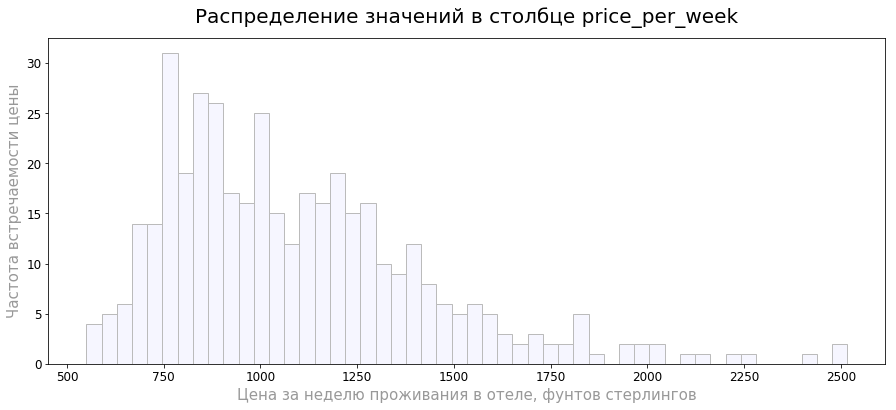

In [35]:
perfect_hist(df['price_per_week'], 50, '#f6f6ff', 'Распределение значений в столбце price_per_week', \
            'Цена за неделю проживания в отеле, фунтов стерлингов', 'Частота встречаемости цены')

Большинство цен - в диапазоне примерно от 750 до 1400 фунтов стерлингов, но мы уже проверили describe. Взглянем с помощью боксплота на выбросы (для него тоже определим функцию): 

In [36]:
def amazing_boxplot(box_data, box_title, box_color, x_box):
    plt.figure(figsize=(15, 5))
    sns.boxplot(box_data, color=box_color)
    plt.title(box_title, fontsize=20, pad=15)
    plt.xlabel(x_box, fontsize=15, color='#999999');

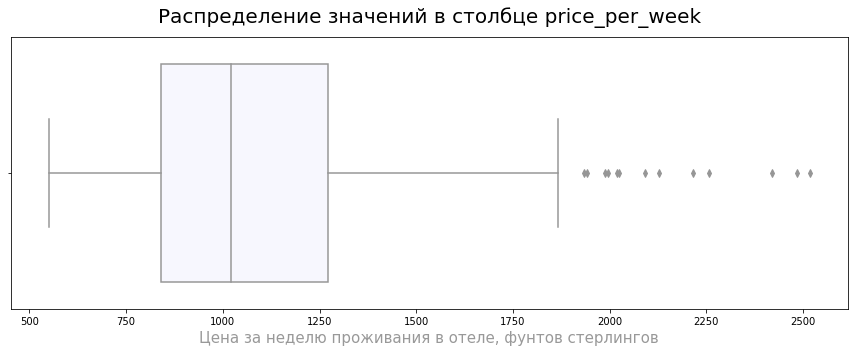

In [37]:
amazing_boxplot(df['price_per_week'], 'Распределение значений в столбце price_per_week', \
                '#f6f6ff', 'Цена за неделю проживания в отеле, фунтов стерлингов')

Убирать выбросы, связанные с ценами всегда непросто - очень дорогие курорты имеют право на существование. Но выбросы отрицательно влияют на статистические показатели, поэтому **продолжим без них**:

In [38]:
df = df[df['price_per_week'] < 1900].reset_index(drop=True)

Посмотрим **средние цены по курортам** - сгруппируем данные для определения максимальных и минимальных средних цен:

In [39]:
resort_prices_high = round(df.groupby(['resort', 'country']).agg({'price_per_week':'mean'}).\
sort_values(by='price_per_week', ascending=False).reset_index(), 0).head(20)

resort_prices_low = round(df.groupby(['resort', 'country']).agg({'price_per_week':'mean'}).\
sort_values(by='price_per_week', ascending=True).reset_index(), 0).head(20)

Для вывода двух датасетов рядом определим функцию - она нам ещё пригодится:

In [40]:
def two_sets_beside(df_one, df_two, name_one, name_two):
    high_styler = df_one.style.set_table_attributes("style='display:inline'").set_caption(name_one)
    low_styler = df_two.style.set_table_attributes("style='display:inline'").set_caption(name_two)
    display_html(high_styler._repr_html_() + '\xa0'*6 + low_styler._repr_html_(), raw=True)

Передадим агрументы функции и ознакомимся с результатом:

In [41]:
two_sets_beside(resort_prices_high, resort_prices_low, 'Самые дорогие курорты', 'Самые доступные курорты')

,resort,country,price_per_week
0,courchevel-1650,france,1775
1,hochgurgl,austria,1755
2,les-menuires,france,1636
3,st-christoph,austria,1604
4,obertauern,austria,1576
5,meribel,france,1507
6,zurs-am-arlberg,austria,1498
7,lech,austria,1486
8,courchevel-1850,france,1471
9,obergurgl,austria,1420


Интересно - среди стран с самыми дорогими курортами исключительно Франция и Австрия. Посмотрим **средние и медианные цены по странам**:

In [42]:
country_mean_price = round(df.groupby('country').agg({'price_per_week':'mean'}).\
                           sort_values(by='price_per_week', ascending=False).reset_index(), 2)

country_median_price = round(df.groupby('country').agg({'price_per_week':'median'}).\
                             sort_values(by='price_per_week', ascending=False).reset_index(), 2)

two_sets_beside(country_mean_price, country_median_price, 'Средние цены по странам', 'Медианные цены по странам')

,country,price_per_week
0,france,1182.41
1,austria,1168.41
2,italy,925.75
3,finland,885.71
4,andorra,856.14
5,bulgaria,685.91
,country,price_per_week
0,france,1182
1,austria,1170.5
2,finland,890


Вполне ожидаемо. Эти **цифры важны для общего портрета**, "средними" мы можем здесь считать Финляндию, Италию и Андорру. В любом случае, мы далее составим портреты для каждой страны, потому что уже сейчас видно, что некоторые показатели очень разнятся.

<a id='eda_meters_from_lift'> </a>

---
> ### 2.4 meters_from_lift

В этом столбце было почти 50% пропусков. Сгруппируем данные и передадим их функции two_sets_beside для отображения двух датасетов рядом:

In [43]:
max_meters_from_lift = round(df.groupby(['resort', 'country']).agg({'meters_from_lift':'mean'}).\
                             sort_values(by='meters_from_lift', ascending=False).reset_index(), 2).head(20)

min_meters_from_lift = round(df.groupby(['resort', 'country']).agg({'meters_from_lift':'mean'}).\
                             sort_values(by='meters_from_lift', ascending=True).reset_index(), 2).head(20)

In [44]:
two_sets_beside(max_meters_from_lift, min_meters_from_lift, 'Курорты с максимальным средним расстоянием до подъёмников', \
               'Курорты с минимальным средним расстоянием до подъёмников')

,resort,country,meters_from_lift
0,pamporovo,bulgaria,1800
1,bansko,bulgaria,716.67
2,galtur,austria,640.18
3,canazei,italy,572.48
4,kitzbuhel,austria,569.34
5,san-candido,italy,524
6,schladming,austria,521.07
7,ellmau,austria,500
8,seefeld,austria,488.84
9,mayrhofen,austria,480.41


Взглянем на общее числовое описание столбца:

In [45]:
d(df.meters_from_lift)

count     393.00
mean      277.22
std       303.67
min         5.00
25%       140.00
50%       200.00
75%       300.00
max      3000.00
Name: meters_from_lift, dtype: float64

**В среднем - 277 метров, а медиана - 200 метров**. Расстояния не очень далёкие - для "среднего отеля" этот пункт стоит учесть. За неимением данных о популярности отелей и курортов, нам сложно сделать какие-либо выводы - логично, что чем ближе - тем лучше, но, вполне возможно, что большое расстояние означает лучшие трассы для катания, лучшие виды и так далее. Ознакомимся с гистограммой:

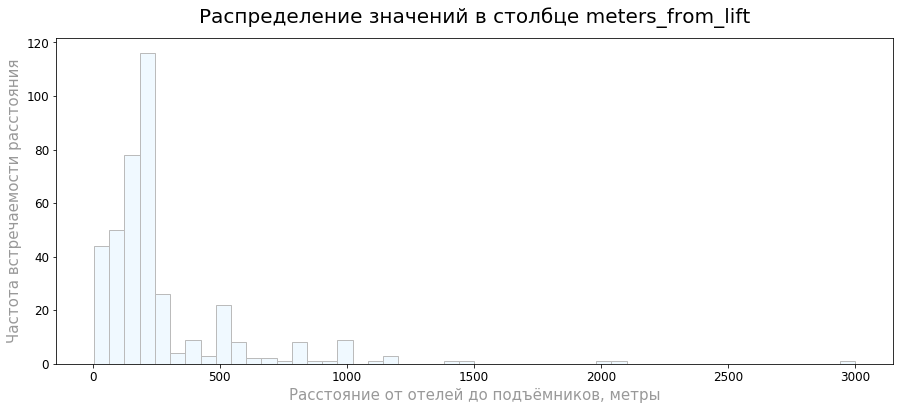

In [46]:
perfect_hist(df['meters_from_lift'], 50, '#f0f9ff', \
             'Распределение значений в столбце meters_from_lift', \
             'Расстояние от отелей до подъёмников, метры', 'Частота встречаемости расстояния')

На графике мы видим, что в большинстве случаев расстояния небольшие.

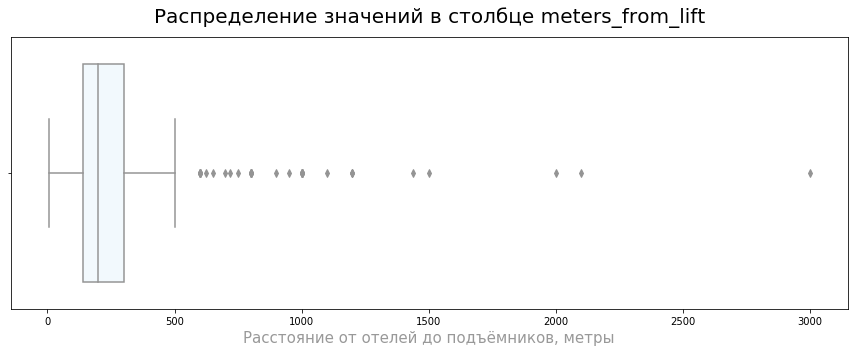

In [47]:
amazing_boxplot(df['meters_from_lift'], 'Распределение значений в столбце meters_from_lift', \
                '#f0f9ff', 'Расстояние от отелей до подъёмников, метры')

Несколько неожиданно. Посмотрим, сколько значений больше 500 метров:

In [48]:
len(df[df['meters_from_lift'] > 500])

41

**Почти 10% данных** - это много. Тем более, отели вполне могут быть расположены в таких местах, где до подъёмников далеко - уберём только значения больше 1000 метров. Заодно округлим столбец до целых чисел, нам ни к чему избыточная точность здесь:

In [49]:
df['meters_from_lift'] = df['meters_from_lift'].astype('int64')
df = df[df['meters_from_lift'] < 1001].reset_index(drop=True)

<a id='eda_altitude_m'> </a>

---
> ### 2.5 altitude_m

Сравним высоты, на которых находятся курорты. В группировке укажем расстояние до подъёмников - ведь **курорт может располагаться у подножья горы, а трасса - на расстоянии**. Также выведем данные по общей длине трасс:

In [50]:
max_hights = round(df.groupby(['resort', 'country']).agg({'altitude_m':'mean', \
                   'meters_from_lift':'mean', 'total_piste_km':'mean'}).\
                   sort_values(by='altitude_m', ascending=False).reset_index(), 2).head(20)

min_hights = round(df.groupby(['resort', 'country']).agg({'altitude_m':'mean', \
                   'meters_from_lift':'mean', 'total_piste_km':'mean'}).\
                   sort_values(by='altitude_m', ascending=True).reset_index(), 2).head(20)

two_sets_beside(max_hights, min_hights, 'Курорты с максимальной высотой', 'Курорты с минимальной высотой')

,resort,country,altitude_m,meters_from_lift,total_piste_km
0,val-thorens,france,2300,158.33,600
1,hochgurgl,austria,2150,50,0
2,aime-la-plagne,france,2100,100,225
3,plagne-soleil,france,2100,200,225
4,plagne-centre,france,2100,100,225
5,tignes-val-claret,france,2100,75,300
6,tignes-le-lac,france,2100,75,300
7,tignes,france,2100,210,300
8,hochsolden,austria,2090,205,146
9,pas-de-la-casa,andorra,2050,181.36,193


Картина получается очень интересная - **многие курорты предлагают сотни километров трасс** - так получается, вероятнее всего, из-за множества разных конфигураций. На паре курортов указана протяжённость "0" - скорее всего это ошибка в данных, но мы ещё не смотрели столбец с протяжённостью трасс. В целом, сложно заметить какую-либо зависимость между высотой отеля и расстоянием до подъёмников. Проверим **коэффициент корреляции Пирсона**:

In [51]:
print(df['altitude_m'].corr(df['meters_from_lift']))

-0.11581913628287732


Коэффициент низкий, **корреляция между высотой отеля и расстоянием до подъёмников незначительная**. Оценим средние и медианные высоты по странам:

In [52]:
mean_hights = round(df.groupby('country').agg({'altitude_m':'mean'}).\
                   sort_values(by='altitude_m', ascending=False).reset_index(), 2).head(20)

median_hights = round(df.groupby('country').agg({'altitude_m':'median'}).\
                   sort_values(by='altitude_m', ascending=False).reset_index(), 2).head(20)

two_sets_beside(mean_hights, median_hights, 'Средняя высота расположения курортов по странам', \
                'Медианы высот расположения курортов по странам')

,country,altitude_m
0,andorra,1834.48
1,france,1733.25
2,italy,1574.56
3,bulgaria,1167.14
4,austria,1066.12
5,finland,317.71
,country,altitude_m
0,france,1850
1,andorra,1800
2,italy,1550


Очевидны **значительные различия между средними и медианами**, например, для Финляндии разница составляет почти 50%. Теперь применим describe и построим гистограмму:

In [53]:
d(df.altitude_m)

count     384.00
mean     1363.23
std       504.99
min       180.00
25%       900.00
50%      1448.00
75%      1800.00
max      2300.00
Name: altitude_m, dtype: float64

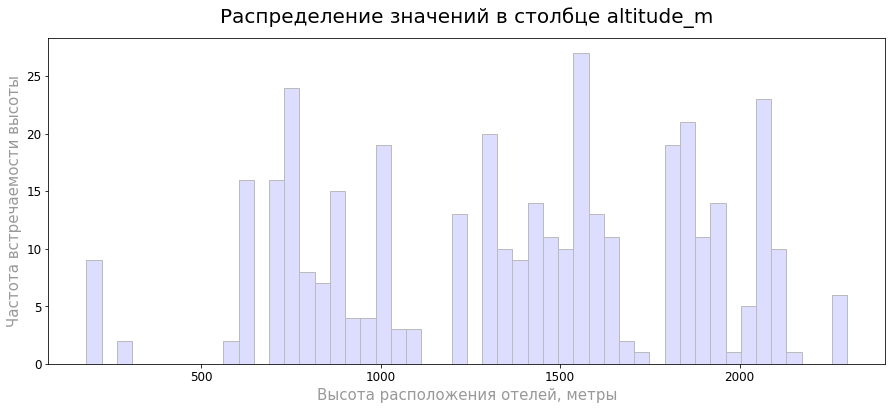

In [54]:
perfect_hist(df['altitude_m'], 50, '#ddddff', 'Распределение значений в столбце altitude_m', \
             'Высота расположения отелей, метры', 'Частота встречаемости высоты')

Сложно заметить какие-либо значимые особенности. Оценим боксплот:

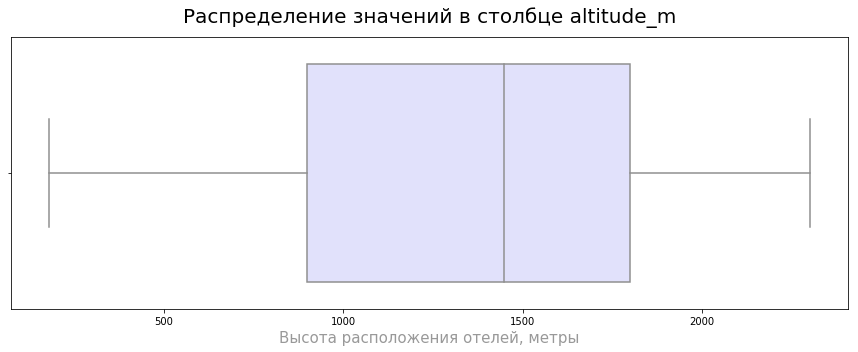

In [55]:
amazing_boxplot(df['altitude_m'], 'Распределение значений в столбце altitude_m', \
                '#ddddff', 'Высота расположения отелей, метры')

Замечательно, ни одного выброса.

<a id='eda_total_piste_km'> </a>

---
> ### 2.6 total_piste_km

Изучим длину горнолыжных трасс на курортах:

In [56]:
d(df.total_piste_km)

count     384.00
mean      221.99
std       163.67
min         0.00
25%       110.00
50%       193.00
75%       300.00
max      1220.00
Name: total_piste_km, dtype: float64

В среднем - 220 километров, должно хватить всем. Но нам стоит выяснить, сколько курортов с нулевым расстоянием - и убрать их:

In [57]:
df.total_piste_km.sort_values().head()

68      0
140     0
31      0
375     0
108    12
Name: total_piste_km, dtype: int64

Всего 4 - продолжим без них.

In [58]:
df = df[df['total_piste_km'] != 0].reset_index(drop=True)

Посмотрим на распределение величин:

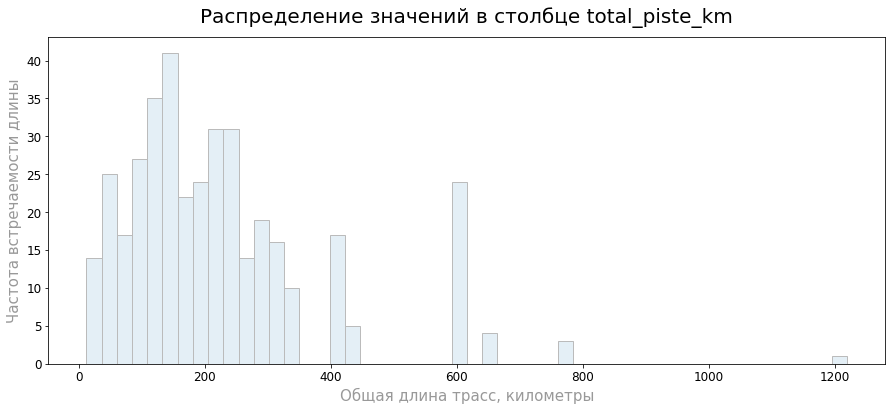

In [59]:
perfect_hist(df['total_piste_km'], 50, '#e4eff6', 'Распределение значений в столбце total_piste_km', \
             'Общая длина трасс, километры', 'Частота встречаемости длины')

В общем-то мы видим то же, что и в describe - 75% значений это длина трасс примерно до 300 километров, но так же видим, что нередки трассы с общим километражом 400 и 600. Очевидны выбросы - посмотрим на боксплот и уберём выбросы из нашего очищенного датасета:

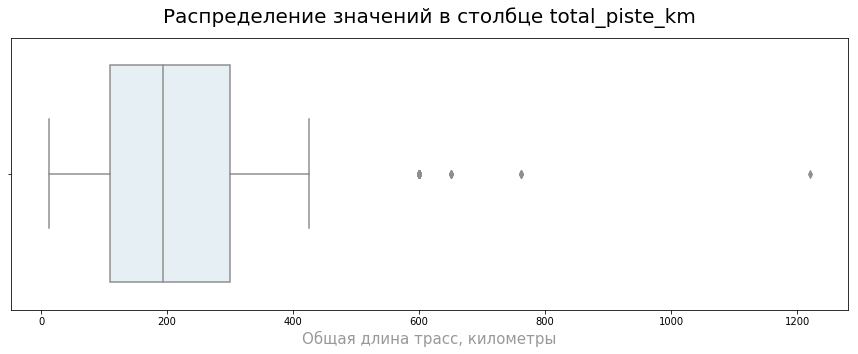

In [60]:
amazing_boxplot(df['total_piste_km'], 'Распределение значений в столбце total_piste_km', \
                 '#e4eff6', 'Общая длина трасс, километры')

In [61]:
df = df[df['total_piste_km'] < 500].reset_index(drop=True)

Интересное наблюдение для строительства отеля на одном из курортов можно сделать при **соотношении минимального количества отелей на курортах к максимальной длине трасс**:

In [62]:
resorts_piste = df.groupby(['resort', 'country']).agg({'hotel':'count','total_piste_km':'sum'}).\
                sort_values(by='total_piste_km', ascending=False).reset_index()

resorts_piste['hotels_to_piste_ratio'] = (resorts_piste['total_piste_km'] / resorts_piste['hotel']).astype('int64')

resorts_piste.sort_values(by='hotels_to_piste_ratio', ascending=False).reset_index(drop=True).head(10)

,resort,country,hotel,total_piste_km,hotels_to_piste_ratio
0,belle-plagne,france,4,1700,425
1,bourg-st-maurice,france,1,425,425
2,sauze-d-oulx,italy,10,4000,400
3,sestriere,italy,5,2000,400
4,montgenevre,france,2,800,400
5,cervinia,italy,8,2800,350
6,st-christoph,austria,2,696,348
7,lech,austria,4,1220,305
8,st-anton,austria,12,3660,305
9,tignes-val-claret,france,2,600,300


Для тех, кто любит, когда нет толкучки на трассах, здесь есть что предложить - на пяти курортах более **400 километров трасс на один отель**. На самом деле - **интересный инсайт**, отметим его. В топе - французские, итальянские и австрийские курорты, к сожалению у нас нет информации о пересечении трасс на курортах. Посмотрим на длины трасс:

In [63]:
max_piste = round(resorts_piste.sort_values(by='total_piste_km', ascending=False).reset_index(drop=True)).head(20)
min_piste = round(resorts_piste.sort_values(by='total_piste_km', ascending=True).reset_index(drop=True)).head(20)

two_sets_beside(max_piste, min_piste, 'Курорты с максимальной длиной трасс', 'Курорты с минимальной длиной трасс')

,resort,country,hotel,total_piste_km,hotels_to_piste_ratio
0,sauze-d-oulx,italy,10,4000,400
1,st-anton,austria,12,3660,305
2,cervinia,italy,8,2800,350
3,saalbach,austria,10,2700,270
4,val-d-isere,france,9,2700,300
5,soldeu,andorra,11,2310,210
6,soll,austria,9,2250,250
7,pas-de-la-casa,andorra,11,2123,193
8,selva-val-gardena,italy,12,2100,175
9,bad-hofgastein,austria,10,2080,208


Мы видим, что в группу с минимальной длиной склонов попали французские **courchevel-1650 и courchevel-1850** - а они одни из самых дорогих, что наталкивает нас на мысль об отсутствии связи между ценой и длиной трасс - проверим:

In [64]:
print(df['total_piste_km'].corr(df['price_per_week']))

0.2428999245493489


Действительно, показатель довольно низкий, что говорит об **отсутствии корреляции между ценой отеля и длиной трасс**. Вероятно, влияют другие факторы - например сам по себе престиж курорта, или просто уровень отеля и сервиса, но более детально мы проверим корреляции на одном из следующих шагов. Изучим средние и медианы протяжённости трасс по странам:

In [65]:
mean_hights = round(df.groupby('country').agg({'total_piste_km':'mean'}).\
                   sort_values(by='total_piste_km', ascending=False).reset_index(), 2).head(20)

median_hights = round(df.groupby('country').agg({'total_piste_km':'median'}).\
                   sort_values(by='total_piste_km', ascending=False).reset_index(), 2).head(20)

two_sets_beside(mean_hights, median_hights, 'Средняя длина трасс в странах', 'Медианы длинн трасс в странах')

,country,total_piste_km
0,france,273.13
1,austria,179.24
2,italy,178.56
3,andorra,168.07
4,bulgaria,59.14
5,finland,36.73
,country,total_piste_km
0,france,250
1,andorra,193
2,austria,175


Посмотрим на разницу нагляднее:

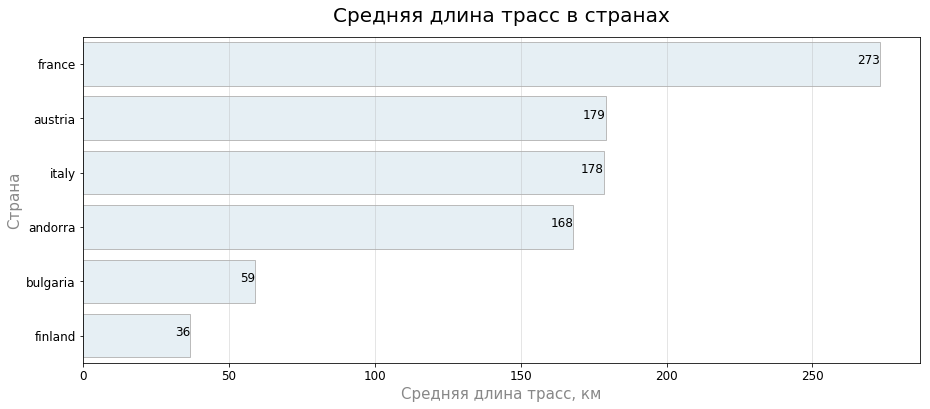

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(data=mean_hights, x='total_piste_km', y='country', edgecolor='#bbbbbb', color='#e4eff6')
for a, b in enumerate(mean_hights['total_piste_km'].values):
    plt.text(b, a, int(b), horizontalalignment='right', va='baseline', fontdict={'size':12})
plt.title('Средняя длина трасс в странах', fontsize=20, pad=15)
plt.xlabel('Средняя длина трасс, км', fontsize=15, color='#888888')
plt.ylabel('Страна', fontsize=15, color='#888888')
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='x', alpha=0.4);

**Франция - абсолютный лидер по длине трасс** - во много раз превосходя, например, Финляндию.

<a id='eda_total_lifts'> </a>

---
> ### 2.7 total_lifts

Посмотрим на количество подъёмников на курортах:

In [67]:
d(df.total_lifts)

count    348.00
mean      56.05
std       29.10
min        0.00
25%       30.00
50%       56.00
75%       81.25
max      171.00
Name: total_lifts, dtype: float64

In [68]:
max_lifts = round(df.groupby(['resort', 'country']).agg({'total_lifts':'mean', 'total_piste_km':'mean'}).\
                   sort_values(by='total_lifts', ascending=False).reset_index(), 2).head(20)

min_lifts = round(df.groupby(['resort', 'country']).agg({'total_lifts':'mean', 'total_piste_km':'mean'}).\
                   sort_values(by='total_lifts', ascending=True).reset_index(), 2).head(20)

In [69]:
two_sets_beside(max_lifts, min_lifts, 'Курорты с максимальным средним количеством подъёмников',\
                'Курорты с минимальным средним количеством подъёмников')

,resort,country,total_lifts,total_piste_km
0,bourg-st-maurice,france,171,425
1,aime-la-plagne,france,139,225
2,belle-plagne,france,139,425
3,plagne-centre,france,105,225
4,plagne-soleil,france,105,225
5,st-christoph,austria,97,348
6,ellmau,austria,95,280
7,soll,austria,94,250
8,sestriere,italy,94,400
9,schladming,austria,93,175


Во Франции явно не любят стоять в очередях - это единственная страна, в которой в среднем больше ста подъёмников на курорт. Посмотрим, коррелирует ли количество подъёмников с длиной трасс:

In [70]:
print(df['total_lifts'].corr(df['total_piste_km']))

0.8068959277022747


**Корреляция количества подъёмников с длиной трасс сильная** - это логично, но тем не менее, это тоже важный инсайт. Посмотрим на гистограмму:

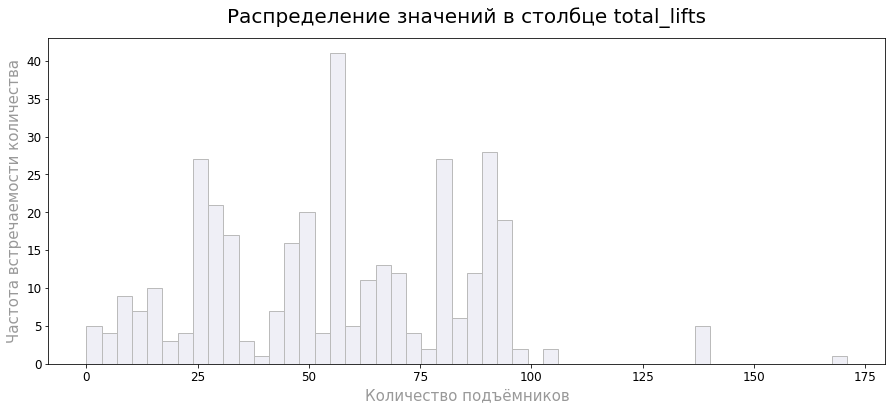

In [71]:
perfect_hist(df['total_lifts'], 50, '#efeff6', 'Распределение значений в столбце total_lifts', \
             'Количество подъёмников', 'Частота встречаемости количества')

Больше ста подъёмников на курорт - редкость. Построим боксплот:

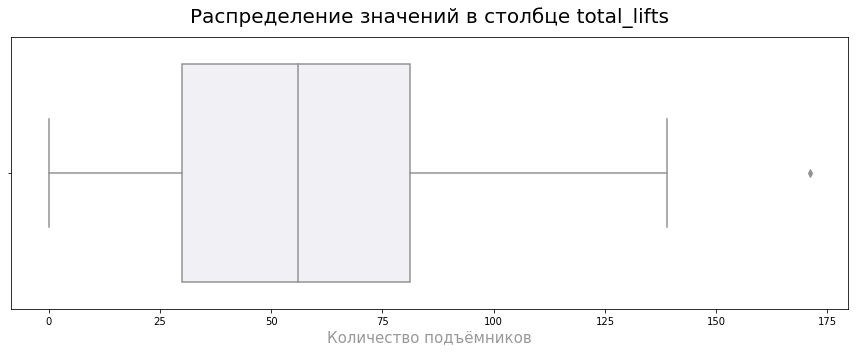

In [72]:
amazing_boxplot(df['total_lifts'], 'Распределение значений в столбце total_lifts', '#efeff6', 'Количество подъёмников')

Выброс одинокий отправим в компанию к остальным выбросам:

In [73]:
df = df[df['total_lifts'] < 150].reset_index(drop=True)

<a id='eda_gondolas'> </a>

---
> ### 2.8 Столбцы с типами подъёмников (gondolas, chairlifts, draglifts)

Здесь не будем останавливаться надолго, потому что для исследования эти столбцы нам не принесут много пользы. Изучим числовые описания:

In [74]:
lift_types = [['gondolas', 'chairlifts', 'draglifts']]
for i in lift_types:
    d(df[i])

,gondolas,chairlifts,draglifts
count,347.00,347.00,347.00
mean,8.09,23.03,23.35
std,6.17,13.95,14.83
min,0.00,0.00,0.00
25%,3.00,12.00,12.00
50%,8.00,21.00,21.00
75%,11.00,33.00,31.00
max,28.00,66.00,62.00


Очевидно, **кресельные и канатные подъёмники более распространены**, причём их средние и медианы сопоставимы. Гондоллы встречаются значительно реже.

<a id='eda_blues'> </a>

---
> ### 2.9 Столбцы с типами трасс (blues, reds, blacks)

На этих столбцах также не будем заострять внимание, сами типы означают опасность спуска, где blue - безопасный, red - средний, а black - очень опасный:

In [75]:
lift_types = [['blues', 'reds', 'blacks']]
for i in lift_types:
    d(df[i])

,blues,reds,blacks
count,347.00,347.00,347.00
mean,36.82,40.05,13.49
std,33.29,30.90,12.19
min,0.00,0.00,0.00
25%,16.00,18.00,4.00
50%,29.00,34.00,9.00
75%,42.00,49.00,22.00
max,140.00,129.00,51.00


**Трассы низкой (blues) и средней (reds) опасности встречаются значительно чаще**, чем максимально опасные спуски (blacks).

<a id='eda_sleeps'> </a>

---
> ### 2.10 sleeps

Посмотрим на количество спальных мест в отелях. Сгруппируем данные по отелям, курортам и странам и посчитаем среднее для каждого курорта:

In [76]:
max_sleeps = df[['hotel', 'resort', 'country', 'sleeps']].sort_values(by='sleeps', ascending=False).\
             head(20).reset_index(drop=True)

min_sleeps = df[['hotel', 'resort', 'country', 'sleeps']].sort_values(by='sleeps', ascending=True).\
             head(20).reset_index(drop=True)

Выведем рядом два датасета:

In [77]:
two_sets_beside(max_sleeps, min_sleeps, 'Отели с максимальным количеством спальных мест', \
                                        'Отели с минимальным количеством спальных мест')

,hotel,resort,country,sleeps
0,hotel-rila,borovets,bulgaria,1200
1,hotel-planibel,la-thuile,italy,762
2,chamois-lodge,les-deux-alpes,france,600
3,hotel-samokov,borovets,bulgaria,590
4,hotel-val-claret,tignes-val-claret,france,514
5,hotel-princesa-parc,arinsal,andorra,500
6,hotel-du-golf,les-arcs-1800,france,492
7,levi-hotel-spa,levi,finland,440
8,hotel-perelik,pamporovo,bulgaria,424
9,hotel-palace,bad-hofgastein,austria,396


Интересно - отели на 2 и 4 места, похоже на гостеприимство. Такие, пожалуй, заказчику рекомендовать не будем. Посмотрим, что покажет describe и гистограмма:

In [78]:
d(df.sleeps)

count     347.00
mean      124.73
std       112.76
min         2.00
25%        70.00
50%        84.00
75%       146.00
max      1200.00
Name: sleeps, dtype: float64

Тот самый "средний" отель содержит 124 места (при медиане 84) - но, как известно, на среднее сильно влияют выбросы. Ознакомимся с ними:

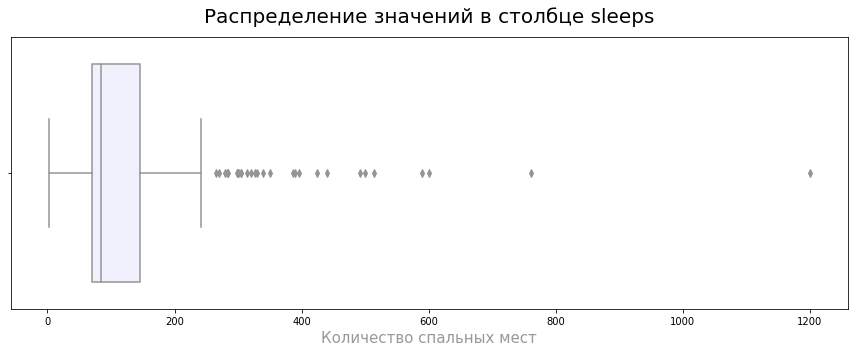

In [79]:
amazing_boxplot(df['sleeps'], 'Распределение значений в столбце sleeps', '#efefff', 'Количество спальных мест')

Те самые отели по 2-4 места даже не посчитались выбросами. Похоже, что верхняя планка - 230 мест, а все отели из нашего топа - выбросы. Посмотрим, сколько их: 

In [80]:
len(df[df['sleeps'] > 230])

38

Более 10% данных. Ознакомимся и с гистограммой:

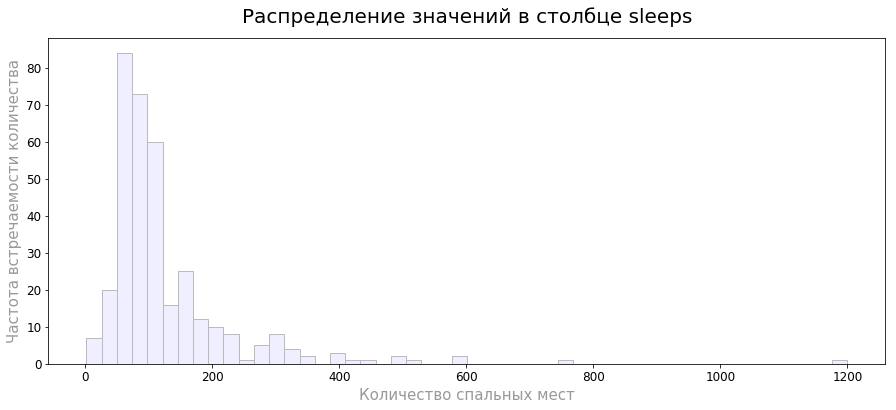

In [81]:
perfect_hist(df['sleeps'], 50, '#efefff', 'Распределение значений в столбце sleeps', \
             'Количество спальных мест', 'Частота встречаемости количества')

Вполне ожидаемо после боксплота. Чтобы не терять большой объём данных, уберём только те отели, в которых более 300 мест. Не будем же медлить:

In [82]:
df = df[df['sleeps'] < 301].reset_index(drop=True)

<a id='eda_snow'> </a>

---
> ### 2.11 столбцы с количеством осадков на курортах

Остаётся последняя группа столбцов - в них указано сколько сантиметров снега выпадает на нижних и на верхних склонах в декабре, январе и феврале. Эта информация нам не пригодится, но с данными мы бегло ознакомимся:

In [83]:
df_last_six = [df_last_six]
for i in df_last_six:
    d(df[i])

,dec_snow_low_cm,dec_snow_high_cm,jan_snow_low_cm,jan_snow_high_cm,feb_snow_low_cm,feb_snow_high_cm
count,327.00,327.00,327.00,327.00,327.00,327.00
mean,42.72,117.16,65.25,168.16,66.25,173.35
std,35.41,79.61,37.66,72.08,36.15,70.40
min,0.00,25.00,5.00,53.44,5.00,69.06
25%,16.24,58.00,43.00,126.79,46.00,132.00
50%,30.00,100.00,50.00,150.00,51.37,150.00
75%,60.00,165.00,70.00,180.00,89.00,188.91
max,150.00,400.00,190.00,400.00,191.00,400.00


На верхних склонах снега выпадает гораздо больше.

<a id='eda_corr'> </a>

---
> ### 2.12 Построение матрицы корреляций

Мы построим матрицу корреляций для очищенного от выбросов датасета. Вычислим корреляции:

In [84]:
corr_m = round(df.corr(), 2)

Взглянем непосредственно на график:

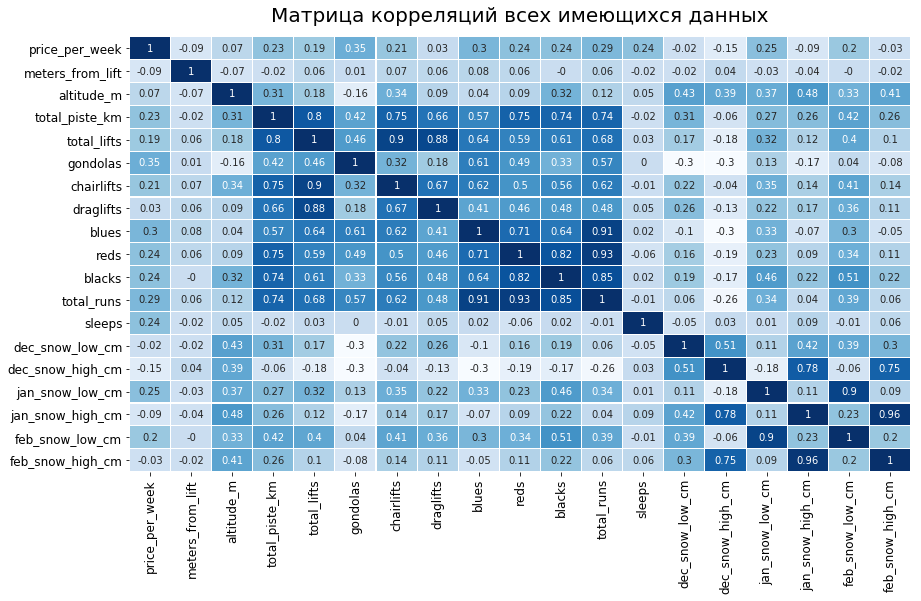

In [85]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_m, annot=True, fmt='.2g', cmap='Blues', linewidths=.1, linecolor='white', cbar=False);
plt.title('Матрица корреляций всех имеющихся данных', fontsize=20, pad=15)
plt.tick_params(axis='both', labelsize=12);

Матрица довольно насыщенная - но если её изучить, то, увы, ничего важного для бизнеса она не показывает. **Явно видна корреляция склонов и подъёмников, а также осадков**, сильно коррелирует длина трасс с количеством подъёмников, что ожидаемо. Стоимость проживания в некоторой степени связна с подъёмниками типа "гондолла", что логично - выше уровень сервиса. 

<a id='eda_conclusion'> </a>

---
> **Выводы исследовательского анализа данных**

Мы детально просмотрели содержимое датасета, а именно:
- изучили числовые описания столбцов;
- ознакомились с распределенями;
- проверили выбросы и пропуски там, где это не удалось сделать на этапе предобработки;
- изучили корреляции данных.

**Выводы** этапа таковы:
- **Количество отелей в странах** распределено таким образом: Австрия 169, Италия 104, Франция 77, Андорра 29, Финляндия 16, Болгария 11;
- **Среднее количество отелей на курорт** в странах: Андорра 9.6, Италия 4.9, Австрия 5.6, Болгария 3.6, Финляндия 3.2, Франция 2.5;
- **Самые дорогие курорты**: courchevel-1650, Франция, 1775 фунтов за неделю проживания; hochgurgl, Австрия, 1755; les-menuires, Франция, 1636;
- **Самые недорогие курорты**: bansko, Болгария, 662 фунтов за неделю; bardonecchia, Италия, 664; borovets, Болгария, 682;
- **Медианы цен по странам**: Франция 1182 фунта за неделю; Австрия 1170; Финляндия 890; Италия 873.5; Андорра 814; Болгария 677;
- Чаще всего **подъёмники расположены на расстоянии 1 километра от отеля**, в среднем - 277 метров, медиана - 200 метров;
- Многие курорты предлагают **сотни километров трасс**; 
- **Средняя высота расположения курортов по странам**: Андорра 1834.48 метров; Франция 1733.25; Италия 1574.56; Болгария 1167.14; Австрия 1066.12; Финляндия 317.71;
- **Медианы высот расположения курортов по странам**: Франция 1850; Андорра 1800; Италия 1550; Болгария 935; Австрия 870; Финляндия 200;
- Средняя высота расположения курортов: 1363.23; медиана: 1448 метров;
- **Средняя длина трасс в странах**: Франция 273.13 километра; Австрия 179.24; Италия 178.56; Андорра 168.07; Болгария 59.14; Финляндия 36.73;
- **Медианы длинн трасс в странах**: Франция 250; Андорра 193; Австрия 175; Италия 140; Болгария 70; Финляндия 44;
- Средняя длина трасс в датасете: 221.99 километров; медиана: 193;
- Среднее количество подъёмников на курортах: 56; медиана: 56; больше всего подъёмников - на фрацузских bourg-st-maurice (171) и aime-la-plagne и belle-plagne (по 139); **на двух курортах нет подъёмников** - это ortisei-st-ulrich в Италии, hochgurgl и galtur в Австрии;
- **Кресельные и канатные подъёмники наиболее распространены**, причём их средние (23.03 и 23.35) и медианы (по 21.00) сопоставимы. Гондоллы встречаются значительно реже - в среднем 8 гондолл на курорт;
- Трассы низкой (blues) и средней (reds) опасности встречаются значительно чаще, чем максимально опасные спуски (blacks).
- **Средний отель содержит 124 места** (медиана 84);
- Матрица корреляций показала корреляцию склонов и подъёмников, а также осадков. 

Продолжим работу.

<a id='portraits'> </a>

<hr style='border: 2px solid #eeeeee'>

## <center> 3. Составление портретов отелей </center>

На этом этапе нам предстоит определить параметры отелей, для чего мы **разделим отели на 3 ценовых категории**, и для каждой 
категории посмотрим картину в разных странах. Но сначала составим средний портрет по ценовым категориям и странам, и затем по портрету на каждую ценовую категорию.

Не будем же терять ни минуты.

<a id='port_mean_hotel'> </a>

---
> ### 3.1 Параметры среднего горнолыжного отеля

Начнём с главного - составление самого среднего отеля. Для дальнейшего удобства поменяем порядок столбцов, чтобы в первую очередь видеть самые информативные столбцы:

In [86]:
df = df.reindex(columns=['country','resort','hotel','price_per_week','sleeps','altitude_m','meters_from_lift',\
                'total_piste_km','total_lifts','gondolas','chairlifts','draglifts','blues','reds','blacks','total_runs'])

И ознакомимся с параметрами - для этого посмотрим среднее по всем колонкам:

In [87]:
mean_hotel = round(df.mean(), 2).astype('float64').reset_index()
mean_hotel = mean_hotel.set_index('index').T.drop({'country','resort','hotel'}, axis=1)

In [88]:
display(mean_hotel)

index,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,1069.73,103.98,1401.19,245.43,189.66,56.69,8.35,23.6,23.61,37.68,41.15,13.84,92.68


Вот и **параметры среднего отеля**:
- цена 1069.73 фунта за неделю проживания;
- 103 спальных места;
- высота над уровнем моря - 1401.19 метров;
- расстояние от отеля до подъёмника - 245.43 метра;

Дополнительно параметры среднего курорта:
- 189 километров трасс;
- 92 конфигурации трасс;
- 56 подъёмников;

<a id='port_mean_diff_classes'> </a>

---
> ### 3.2 Параметры отелей бюджетного, среднего и премиум классов без разделения по странам

Проведём категоризацию по стоимости проживания в неделю. Для этого взглянем на разброс цен, чтобы иметь ориентиры для разделения ценовых сегментов:

In [89]:
d(df.price_per_week)

count     327.00
mean     1069.73
std       287.26
min       550.00
25%       839.00
50%      1016.00
75%      1265.50
max      1866.00
Name: price_per_week, dtype: float64

Представляется логичным сделать следующее разделение: **до 900 фунтов в неделю - бюджетный класс; от 900 до 1300 - средний класс; более 1200 - премиум-класс**. Установим категории:

In [90]:
price_classes = []

for i in df.price_per_week:
    if i < 900:
        price_classes.append('бюджетный')
    elif i < 1200:
        price_classes.append('средний')
    else:
        price_classes.append('премиум')
        
df.insert(4, 'class', price_classes, allow_duplicates = False)

Проверим, как сработал код:

In [91]:
df['class'].value_counts()

средний      116
бюджетный    114
премиум       97
Name: class, dtype: int64

Чётко. **Посмотрим параметры по классам** - для этого нам хватит группировки:

In [92]:
df_classes = round(df.groupby('class').mean().sort_values(by='price_per_week'), 2).reset_index()
df_classes

,class,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,бюджетный,781.74,88.61,1366.18,279.82,158.91,48.71,5.46,19.52,22.59,25.07,34.39,10.77,70.24
1,средний,1049.72,109.03,1382.45,216.83,194.09,60.64,9.23,24.80,25.44,39.83,39.09,13.54,92.47
2,премиум,1432.12,116.00,1464.76,239.23,220.51,61.34,10.70,26.96,22.62,49.94,51.56,17.80,119.30


Мы видим, **в отелях больших раличий нет**, кроме количества спальных мест в отелях - чем выше класс, тем больше мест, и средней дистанции до подъёмников (правда, этот показатель не коррелирует с ценой). Зато **есть значительные различия на курортах**:
- **Длина трасс** короче на бюджетных - 158 км, на средних она выше - 194 км, и максимальна на премиальных курортах - 220;
- **Количество подъёмников** минимально на бюджетных - 48, выше на средних - 60, и максимально на премиальных - 61:
- **Типы подъёмников** различаются - на средних и премиальных курортах гондолл гораздо больше, чем на бюджетных, наличие кресельных подъёмников также коррелирует с классом отеля;
- **Количество спусков** явно зависит от класса отеля - это касается как общего количества, так и каждого класса спуска.

Теперь составим собственно портреты.

---
#### 3.2.1 Параметры отеля бюджетного класса

Ещё раз взглянем на цифры, для чего напишем функцию, ведь выводить одни и те же параметры понадобится три раза:

In [93]:
def hotels_describer(hotel_class, class_name, week_price, sleep_places, sea_height, lift_dist,\
                     tracks_kms, tracks_configs, lifts_by_tracks):
    price = week_price
    places = sleep_places
    height = sea_height
    dist_fr_lift = lift_dist
    kms = tracks_kms
    configs = tracks_configs
    lifts = lifts_by_tracks
    
    display(df_classes[df_classes['class'] == hotel_class])
    
    print('')
    print('\033[1m', 'Параметры отеля', class_name, 'класса:', '\033[0m')
    print(f'''- цена за неделю проживания: {price};
- спальных мест: {sleep_places};
- высота над уровнем моря: {sea_height};
- расстояние от отеля до подъёмника: {lift_dist};
''')
    
    print('')
    print('\033[1m', 'Параметры курорта', class_name, 'класса:', '\033[0m')
    print(f'''- километров трасс: {kms};
- конфигураций трасс: {configs};
- число подъёмников: {lifts}.
''')

In [94]:
hotels_describer('бюджетный', 'бюджетного', df_classes['price_per_week'][0], int(df_classes['sleeps'][0]),\
                df_classes['altitude_m'][0], df_classes['meters_from_lift'][0], \
                df_classes['total_piste_km'][0], df_classes['total_runs'][0], df_classes['total_lifts'][0])

,class,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,бюджетный,781.74,88.61,1366.18,279.82,158.91,48.71,5.46,19.52,22.59,25.07,34.39,10.77,70.24



 Параметры отеля бюджетного класса: 
- цена за неделю проживания: 781.74;
- спальных мест: 88;
- высота над уровнем моря: 1366.18;
- расстояние от отеля до подъёмника: 279.82;


 Параметры курорта бюджетного класса: 
- километров трасс: 158.91;
- конфигураций трасс: 70.24;
- число подъёмников: 48.71.



---
#### 3.2.2 Параметры отеля среднего класса

Передадим параметры отеля среднего класса функции и посмотрим результаты:

In [95]:
hotels_describer('средний', 'среднего', df_classes['price_per_week'][1], int(df_classes['sleeps'][1]),\
                df_classes['altitude_m'][1], df_classes['meters_from_lift'][1], \
                df_classes['total_piste_km'][1], df_classes['total_runs'][1], df_classes['total_lifts'][1])

,class,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
1,средний,1049.72,109.03,1382.45,216.83,194.09,60.64,9.23,24.8,25.44,39.83,39.09,13.54,92.47



 Параметры отеля среднего класса: 
- цена за неделю проживания: 1049.72;
- спальных мест: 109;
- высота над уровнем моря: 1382.45;
- расстояние от отеля до подъёмника: 216.83;


 Параметры курорта среднего класса: 
- километров трасс: 194.09;
- конфигураций трасс: 92.47;
- число подъёмников: 60.64.



---
#### 3.2.3 Параметры отеля премиум-класса

Ознакомимся с показателями.

In [96]:
hotels_describer('премиум', 'премиального', df_classes['price_per_week'][2], int(df_classes['sleeps'][2]),\
                df_classes['altitude_m'][2], df_classes['meters_from_lift'][2], \
                df_classes['total_piste_km'][2], df_classes['total_runs'][2], df_classes['total_lifts'][2])

,class,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
2,премиум,1432.12,116.0,1464.76,239.23,220.51,61.34,10.7,26.96,22.62,49.94,51.56,17.8,119.3



 Параметры отеля премиального класса: 
- цена за неделю проживания: 1432.12;
- спальных мест: 116;
- высота над уровнем моря: 1464.76;
- расстояние от отеля до подъёмника: 239.23;


 Параметры курорта премиального класса: 
- километров трасс: 220.51;
- конфигураций трасс: 119.3;
- число подъёмников: 61.34.



<a id='port_countries_cheap'> </a>

---
> ### 3.3 Параметры бюджетных отелей в разных странах

Посмторим, насколько схожи или различны бюджетные отели:

In [97]:
df_cheap_hotels = round(df[df['class'] == 'бюджетный'].groupby('country').mean(), 2).reset_index()
df_cheap_hotels

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,andorra,731.44,105.56,1869.44,254.72,159.72,54.50,3.44,23.94,22.39,38.83,31.33,17.56,87.72
1,austria,801.28,81.86,822.76,269.48,127.10,51.34,8.52,15.17,26.97,26.86,30.34,7.79,65.00
2,bulgaria,677.00,70.00,935.00,600.00,70.00,24.00,1.00,7.00,16.00,5.00,8.00,1.00,14.00
3,finland,828.40,75.80,204.00,140.00,36.80,10.20,0.40,1.00,5.20,7.20,9.40,2.00,18.60
4,france,813.00,88.67,1516.67,300.00,249.67,76.67,11.00,20.33,44.33,43.00,53.33,22.67,119.00
5,italy,783.74,88.16,1581.53,298.28,181.93,47.90,4.79,22.09,20.95,20.86,39.00,10.47,70.33


Мы видим **значительные различия во всех показателях**, например:
- **средняя стоимость** в неделю в болгарских бюджетных отелях гораздо ниже, чем в остальных; 
- **высота над уровнем моря** в Финляндии почти в 9 раз меньше чем в Андорре;
- различаются **расстояния до подъёмников**;
- сильный разброс величин в **протяжённости трасс**;
- разнятся количества подъёмников, типы спусков и общее количество трасс.

Составим портрет бюджетного отеля для каждой страны.

---
#### 3.3.1 Параметры бюджетного отеля, Андорра

Ознакомимся с показателями. Для этого доработаем нашу функцию hotels_describer::

In [98]:
def country_hotels_describer(hotel_data, hotel_country, class_name, country_name, week_price, sleep_places, sea_height, \
                             lift_dist, tracks_kms, tracks_configs, lifts_by_tracks):
    price = week_price
    places = sleep_places
    height = sea_height
    dist_fr_lift = lift_dist
    kms = tracks_kms
    configs = tracks_configs
    lifts = lifts_by_tracks
    
    display(hotel_data[hotel_data['country'] == hotel_country])
    
    print('')
    print('\033[1m', 'Параметры отеля', class_name, 'класса,', country_name, '\033[0m')
    print(f'''- цена за неделю проживания: {price};
- спальных мест: {sleep_places};
- высота над уровнем моря: {sea_height};
- расстояние от отеля до подъёмника: {lift_dist};
''')
    
    print('')
    print('\033[1m', 'Параметры курорта', class_name, 'класса,', country_name, '\033[0m')
    print(f'''- километров трасс: {kms};
- конфигураций трасс: {configs};
- число подъёмников: {lifts}.
''')

In [99]:
country_hotels_describer(df_cheap_hotels, 'andorra', 'бюджетного', 'Андорра:', df_cheap_hotels['price_per_week'][0], \
                         int(df_cheap_hotels['sleeps'][0]), df_cheap_hotels['altitude_m'][0], \
                         df_cheap_hotels['meters_from_lift'][0], df_cheap_hotels['total_piste_km'][0], \
                         df_cheap_hotels['total_runs'][0], int(df_cheap_hotels['total_lifts'][0]))

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,andorra,731.44,105.56,1869.44,254.72,159.72,54.5,3.44,23.94,22.39,38.83,31.33,17.56,87.72



 Параметры отеля бюджетного класса, Андорра: 
- цена за неделю проживания: 731.44;
- спальных мест: 105;
- высота над уровнем моря: 1869.44;
- расстояние от отеля до подъёмника: 254.72;


 Параметры курорта бюджетного класса, Андорра: 
- километров трасс: 159.72;
- конфигураций трасс: 87.72;
- число подъёмников: 54.



---
#### 3.3.2 Параметры бюджетного отеля, Австрия

На этом шаге мы можем сократить количество аргументов, передаваемых функции country_hotels_describer. Для этого упакуем её в другую функцию:

In [100]:
def tricky_describer(tricky_data, tricky_country, tricky_class, tricky_c_name, tricky_index):
    country_hotels_describer(tricky_data, tricky_country, tricky_class, tricky_c_name, \
                             tricky_data['price_per_week'][tricky_index], int(tricky_data['sleeps'][tricky_index]), \
                             tricky_data['altitude_m'][tricky_index], tricky_data['meters_from_lift'][tricky_index], \
                             tricky_data['total_piste_km'][tricky_index], tricky_data['total_runs'][tricky_index], \
                             int(tricky_data['total_lifts'][tricky_index]))

Теперь нам достаточно передать всего 5 аргументов функции:

In [101]:
tricky_describer(df_cheap_hotels, 'austria', 'бюджетного', 'Австрия:', 1)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
1,austria,801.28,81.86,822.76,269.48,127.1,51.34,8.52,15.17,26.97,26.86,30.34,7.79,65.0



 Параметры отеля бюджетного класса, Австрия: 
- цена за неделю проживания: 801.28;
- спальных мест: 81;
- высота над уровнем моря: 822.76;
- расстояние от отеля до подъёмника: 269.48;


 Параметры курорта бюджетного класса, Австрия: 
- километров трасс: 127.1;
- конфигураций трасс: 65.0;
- число подъёмников: 51.



---
#### 3.3.3 Параметры бюджетного отеля, Болгария

In [102]:
tricky_describer(df_cheap_hotels, 'bulgaria', 'бюджетного', 'Болгария:', 2)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
2,bulgaria,677.0,70.0,935.0,600.0,70.0,24.0,1.0,7.0,16.0,5.0,8.0,1.0,14.0



 Параметры отеля бюджетного класса, Болгария: 
- цена за неделю проживания: 677.0;
- спальных мест: 70;
- высота над уровнем моря: 935.0;
- расстояние от отеля до подъёмника: 600.0;


 Параметры курорта бюджетного класса, Болгария: 
- километров трасс: 70.0;
- конфигураций трасс: 14.0;
- число подъёмников: 24.



---
#### 3.3.4 Параметры бюджетного отеля, Финляндия

In [103]:
tricky_describer(df_cheap_hotels, 'finland', 'бюджетного', 'Финляндия:', 3)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
3,finland,828.4,75.8,204.0,140.0,36.8,10.2,0.4,1.0,5.2,7.2,9.4,2.0,18.6



 Параметры отеля бюджетного класса, Финляндия: 
- цена за неделю проживания: 828.4;
- спальных мест: 75;
- высота над уровнем моря: 204.0;
- расстояние от отеля до подъёмника: 140.0;


 Параметры курорта бюджетного класса, Финляндия: 
- километров трасс: 36.8;
- конфигураций трасс: 18.6;
- число подъёмников: 10.



---
#### 3.3.5 Параметры бюджетного отеля, Франция

In [104]:
tricky_describer(df_cheap_hotels, 'france', 'бюджетного', 'Франция:', 4)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
4,france,813.0,88.67,1516.67,300.0,249.67,76.67,11.0,20.33,44.33,43.0,53.33,22.67,119.0



 Параметры отеля бюджетного класса, Франция: 
- цена за неделю проживания: 813.0;
- спальных мест: 88;
- высота над уровнем моря: 1516.67;
- расстояние от отеля до подъёмника: 300.0;


 Параметры курорта бюджетного класса, Франция: 
- километров трасс: 249.67;
- конфигураций трасс: 119.0;
- число подъёмников: 76.



---
#### 3.3.6 Параметры бюджетного отеля, Италия

In [105]:
tricky_describer(df_cheap_hotels, 'italy', 'бюджетного', 'Италия:', 5)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
5,italy,783.74,88.16,1581.53,298.28,181.93,47.9,4.79,22.09,20.95,20.86,39.0,10.47,70.33



 Параметры отеля бюджетного класса, Италия: 
- цена за неделю проживания: 783.74;
- спальных мест: 88;
- высота над уровнем моря: 1581.53;
- расстояние от отеля до подъёмника: 298.28;


 Параметры курорта бюджетного класса, Италия: 
- километров трасс: 181.93;
- конфигураций трасс: 70.33;
- число подъёмников: 47.



<a id='port_countries_medium'> </a>

---
> ### 3.4 Параметры отелей среднего класса в разных странах

Сгруппируем данные и взглянем на показатели:

In [106]:
df_medium_hotels = round(df[df['class'] == 'средний'].groupby('country').mean(), 2).reset_index()
df_medium_hotels

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,andorra,997.12,165.75,1800.00,153.75,189.50,61.88,3.75,28.88,24.38,55.00,35.12,19.88,110.00
1,austria,1073.22,102.73,987.00,222.24,178.84,55.73,10.90,20.24,24.08,40.41,41.59,10.02,92.02
2,finland,974.00,72.50,190.00,50.00,32.00,16.00,1.00,1.50,9.00,11.00,14.50,2.00,27.50
3,france,1073.56,112.32,1848.16,168.40,278.60,87.52,10.52,36.84,38.92,55.60,48.96,24.72,129.28
4,italy,1012.97,104.19,1594.28,272.56,162.72,49.62,7.56,22.81,18.28,24.62,30.09,9.34,64.06


В среднем классе **цены сопоставимы**, но в остальном разбросы величин значительны:
- **количество спальных мест** в отелях Андорры гораздо выше, чем отелях остальных стран, а в Финляндии - значительно ниже;
- **велик разброс высот расположения отелей**;
- сильные **различия в расстояниях до подъёмников**;
- заметен большой **разброс значений в трассах** - длина, количество и типы спусков;
- значительная разница и в количестве и типах подъёмников.

Стоит обратить внимание, что отели Болгарии не представлены среди отелей среднего класса. Составим портрет для каждой страны.

---
#### 3.4.1 Параметры отеля среднего класса, Андорра

In [107]:
tricky_describer(df_medium_hotels, 'andorra', 'среднего', 'Андорра:', 0)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,andorra,997.12,165.75,1800.0,153.75,189.5,61.88,3.75,28.88,24.38,55.0,35.12,19.88,110.0



 Параметры отеля среднего класса, Андорра: 
- цена за неделю проживания: 997.12;
- спальных мест: 165;
- высота над уровнем моря: 1800.0;
- расстояние от отеля до подъёмника: 153.75;


 Параметры курорта среднего класса, Андорра: 
- километров трасс: 189.5;
- конфигураций трасс: 110.0;
- число подъёмников: 61.



---
#### 3.4.2 Параметры отеля среднего класса, Австрия

In [108]:
tricky_describer(df_medium_hotels, 'austria', 'среднего', 'Австрия:', 1)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
1,austria,1073.22,102.73,987.0,222.24,178.84,55.73,10.9,20.24,24.08,40.41,41.59,10.02,92.02



 Параметры отеля среднего класса, Австрия: 
- цена за неделю проживания: 1073.22;
- спальных мест: 102;
- высота над уровнем моря: 987.0;
- расстояние от отеля до подъёмника: 222.24;


 Параметры курорта среднего класса, Австрия: 
- километров трасс: 178.84;
- конфигураций трасс: 92.02;
- число подъёмников: 55.



---
#### 3.4.3 Параметры отеля среднего класса, Финляндия

In [109]:
tricky_describer(df_medium_hotels, 'finland', 'среднего', 'Финляндия:', 2)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
2,finland,974.0,72.5,190.0,50.0,32.0,16.0,1.0,1.5,9.0,11.0,14.5,2.0,27.5



 Параметры отеля среднего класса, Финляндия: 
- цена за неделю проживания: 974.0;
- спальных мест: 72;
- высота над уровнем моря: 190.0;
- расстояние от отеля до подъёмника: 50.0;


 Параметры курорта среднего класса, Финляндия: 
- километров трасс: 32.0;
- конфигураций трасс: 27.5;
- число подъёмников: 16.



---
#### 3.4.4 Параметры отеля среднего класса, Франция

In [110]:
tricky_describer(df_medium_hotels, 'france', 'среднего', 'Франция:', 3)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
3,france,1073.56,112.32,1848.16,168.4,278.6,87.52,10.52,36.84,38.92,55.6,48.96,24.72,129.28



 Параметры отеля среднего класса, Франция: 
- цена за неделю проживания: 1073.56;
- спальных мест: 112;
- высота над уровнем моря: 1848.16;
- расстояние от отеля до подъёмника: 168.4;


 Параметры курорта среднего класса, Франция: 
- километров трасс: 278.6;
- конфигураций трасс: 129.28;
- число подъёмников: 87.



---
#### 3.4.5 Параметры отеля среднего класса, Италия

In [111]:
tricky_describer(df_medium_hotels, 'italy', 'среднего', 'Италия:', 4)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
4,italy,1012.97,104.19,1594.28,272.56,162.72,49.62,7.56,22.81,18.28,24.62,30.09,9.34,64.06



 Параметры отеля среднего класса, Италия: 
- цена за неделю проживания: 1012.97;
- спальных мест: 104;
- высота над уровнем моря: 1594.28;
- расстояние от отеля до подъёмника: 272.56;


 Параметры курорта среднего класса, Италия: 
- километров трасс: 162.72;
- конфигураций трасс: 64.06;
- число подъёмников: 49.



<a id='port_countries_premium'> </a>

---
> ### 3.5 Параметры отелей премиум класса в разных странах

Сгруппируем данные и взглянем на показатели:

In [112]:
df_premium_hotels = round(df[df['class'] == 'премиум'].groupby('country').mean(), 2).reset_index()
df_premium_hotels

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,andorra,1824.00,240.00,1800.00,200.00,210.00,67.00,4.00,32.00,26.00,63.00,38.00,22.00,123.00
1,austria,1439.61,109.71,1331.66,269.19,205.37,56.42,11.06,25.23,19.45,52.69,54.23,17.95,124.87
2,france,1429.23,139.14,1806.91,183.41,271.05,79.55,9.18,33.68,34.41,55.18,56.23,22.00,133.41
3,italy,1366.08,95.75,1497.25,190.00,206.92,52.92,12.17,23.17,17.08,25.00,30.33,9.00,64.33


В премиальном классе мы снова видим **очень разные цифры по всем показателям**, особенно бросается в глаза количество спальных мест. У некоторых стран могут быть сопоставимы какие-то значения, например, стоимость за неделю проживания в отелях Австрии и Франции, или высота над уровнем моря отелей Андорры и Франции, но это никак не коррелирует между собой. Так же, следует указать, что отели Финляндии и Болгарии не представлены в этом сегменте.

Выведем портреты премиальных отелей.

---
#### 3.5.1 Параметры отеля премиум-класса, Андорра

In [113]:
tricky_describer(df_premium_hotels, 'andorra', 'премиального', 'Андорра:', 0)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,andorra,1824.0,240.0,1800.0,200.0,210.0,67.0,4.0,32.0,26.0,63.0,38.0,22.0,123.0



 Параметры отеля премиального класса, Андорра: 
- цена за неделю проживания: 1824.0;
- спальных мест: 240;
- высота над уровнем моря: 1800.0;
- расстояние от отеля до подъёмника: 200.0;


 Параметры курорта премиального класса, Андорра: 
- километров трасс: 210.0;
- конфигураций трасс: 123.0;
- число подъёмников: 67.



---
#### 3.5.2 Параметры отеля премиум-класса, Австрия

In [114]:
tricky_describer(df_premium_hotels, 'austria', 'премиального', 'Австрия:', 1)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
1,austria,1439.61,109.71,1331.66,269.19,205.37,56.42,11.06,25.23,19.45,52.69,54.23,17.95,124.87



 Параметры отеля премиального класса, Австрия: 
- цена за неделю проживания: 1439.61;
- спальных мест: 109;
- высота над уровнем моря: 1331.66;
- расстояние от отеля до подъёмника: 269.19;


 Параметры курорта премиального класса, Австрия: 
- километров трасс: 205.37;
- конфигураций трасс: 124.87;
- число подъёмников: 56.



---
#### 3.5.3 Параметры отеля премиум-класса, Франция

In [115]:
tricky_describer(df_premium_hotels, 'france', 'премиального', 'Франция:', 2)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
2,france,1429.23,139.14,1806.91,183.41,271.05,79.55,9.18,33.68,34.41,55.18,56.23,22.0,133.41



 Параметры отеля премиального класса, Франция: 
- цена за неделю проживания: 1429.23;
- спальных мест: 139;
- высота над уровнем моря: 1806.91;
- расстояние от отеля до подъёмника: 183.41;


 Параметры курорта премиального класса, Франция: 
- километров трасс: 271.05;
- конфигураций трасс: 133.41;
- число подъёмников: 79.



---
#### 3.5.4 Параметры отеля премиум-класса, Италия

In [116]:
tricky_describer(df_premium_hotels, 'italy', 'премиального', 'Италия:', 3)

,country,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
3,italy,1366.08,95.75,1497.25,190.0,206.92,52.92,12.17,23.17,17.08,25.0,30.33,9.0,64.33



 Параметры отеля премиального класса, Италия: 
- цена за неделю проживания: 1366.08;
- спальных мест: 95;
- высота над уровнем моря: 1497.25;
- расстояние от отеля до подъёмника: 190.0;


 Параметры курорта премиального класса, Италия: 
- километров трасс: 206.92;
- конфигураций трасс: 64.33;
- число подъёмников: 52.



<a id='port_mean_medium_comparison'> </a>

---
> ### 3.6 Сравнение "среднего отеля" и "отеля среднего класса"

Интересно взглянуть на различия в показателях этих двух категорий. Соедним их в один датафрейм:

In [117]:
mean_hotel.insert(0, 'class', ['средний отель'])

medium_hotel = df_classes[df_classes['class'] == 'средний']
medium_hotel['class'] = medium_hotel['class'].replace('средний', 'отель среднего класса') 

df_mean_vs_medium = mean_hotel.append(medium_hotel)

In [118]:
df_mean_vs_medium.style.set_properties(**{'background-color':'#ffffbb'}, subset=['meters_from_lift'])

index,class,price_per_week,sleeps,altitude_m,meters_from_lift,total_piste_km,total_lifts,gondolas,chairlifts,draglifts,blues,reds,blacks,total_runs
0,средний отель,1069.73,103.98,1401.19,245.43,189.66,56.69,8.35,23.6,23.61,37.68,41.15,13.84,92.68
1,отель среднего класса,1049.72,109.03,1382.45,216.83,194.09,60.64,9.23,24.8,25.44,39.83,39.09,13.54,92.47


В целом, **показатели очень похожи**, более-менее значительно различаются лишь расстояния до подъёмников. Немного подготовим данные и посмотрим на график:

In [119]:
df_mean_vs_medium_plot = df_mean_vs_medium[['price_per_week','sleeps','altitude_m','meters_from_lift',
                                                 'total_piste_km','total_lifts','total_runs']].T.reset_index()
df_mean_vs_medium_plot.columns = ['index', 'mean_hotel', 'medium_hotel']

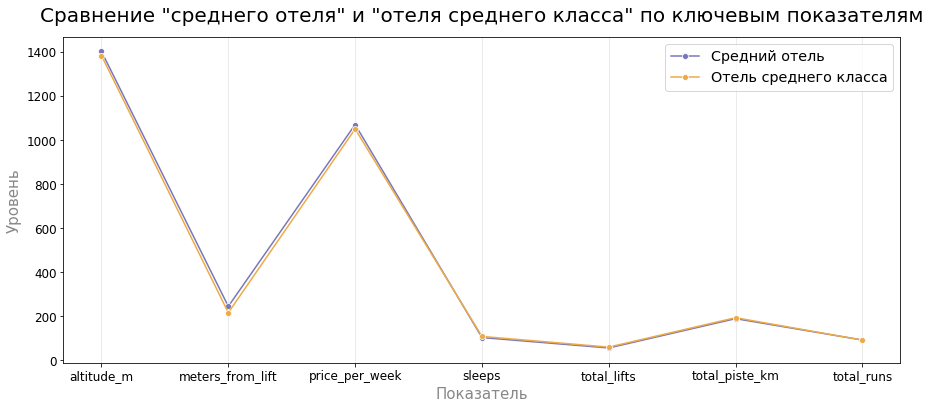

In [120]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_mean_vs_medium_plot, x='index', y='mean_hotel', \
             color='#7777bb', marker="o", label='Средний отель')
sns.lineplot(data=df_mean_vs_medium_plot, x='index', y='medium_hotel', \
             color='#eeaa44', marker="o", label='Отель среднего класса')
plt.title('Сравнение "среднего отеля" и "отеля среднего класса" по ключевым показателям', fontsize=20, pad=15)
plt.xlabel('Показатель', fontsize=15, color='#888888')
plt.ylabel('Уровень', fontsize=15, color='#888888')
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize='x-large')
plt.grid(axis='x', alpha=0.3);

Графически разница совсем минимальна.

<a id='port_conclusion'> </a>

---
> **Выводы этапа определения параметров отелей**

На этом этапе мы провели большую исследовательскую работу, изучив многие показатели. Выводы этапа таковы:

**В бюджетном классе** есть значительные **различия во всех показателях**, например:
- средняя стоимость в неделю в болгарских бюджетных отелях гораздо ниже, чем в остальных; 
- высота над уровнем моря в Финляндии почти в 9 раз меньше чем в Андорре;
- различаются расстояния до подъёмников;
- сильный разброс величин в протяжённости трасс;
- разнятся количества подъёмников, типы спусков и общее количество трасс.

**В среднем классе цены сопоставимы**, но в остальном разбросы величин значительны:
- количество спальных мест в отелях Андорры гораздо выше, чем отелях остальных стран, а в Финляндии - значительно ниже;
- велик разброс высот расположения отелей;
- сильные различия в расстояниях до подъёмников;
- заметен большой разброс значений в трассах - длина, количество и типы спусков;
- значительная разница и в количестве и типах подъёмников.

**В премиальном классе** мы снова увидели **очень разные цифры по всем показателям**, особенно количество спальных мест. У некоторых стран могут быть сопоставимы какие-то значения, например, стоимость за неделю проживания в отелях Австрии и Франции, или высота над уровнем моря отелей Андорры и Франции, но это никак не коррелирует между собой. Так же, следует указать, что отели Финляндии и Болгарии не представлены в этом сегменте.

На последнем этапе мы провели **сравнение "среднего отеля" и "отеля среднего класса"**, где увидели, что их **портреты схожи**, значительная разница обнаружилась только в расстоянии до ближайшего подъёмника - 245.43 у "среднего отеля", и 216.83 - у "отеля среднего класса".

<a id='hypothesis'> </a>

<hr style='border: 2px solid #eeeeee'>

## <center> 4. Проверка статистической гипотезы </center>

Учитывая запрос заказчика на составление портрета "среднего отеля", и результаты нашего исследования, в котором мы дополнительно получили параметры "отеля среднего класса", **сформулируем гипотезу Но: "Цены "среднего отеля" и "отеля среднего класса" не различаются"**. Тогда альтернативная гипотеза: "Цены "среднего отеля" и "отеля среднего класса" различаются".

Сгруппируем данные и **проведём тест Манна-Уитни** - он устойчивее к выбросам и к форме распределения, а также имеет большую мощность, чем t-test. Уровень статистической значимости установим классический, 0.05:

In [121]:
mean_hotel_hypothetical = df['price_per_week']
medium_hotel_hypothetical = df[df['class'] == 'средний']['price_per_week']

In [122]:
alpha = 0.05
results = st.mannwhitneyu(mean_hotel_hypothetical, medium_hotel_hypothetical)
p_value = results.pvalue

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы')

p-значение:  0.20273971539155727
Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы


Мы видим что p-value больше значения alpha, что позволяет сказать, что **данные не противоречат нулевой гипотезе - не отвергаем**.

<a id='conclusion'> </a>

<hr style='border: 2px solid #eeeeee'>

## <center> Выводы исследования </center>

Перед нами стояло немало задач, которые мы смогли выполнить в процессе работы с предоставленными файлами.

**1.** Мы получили данные и ознакомились с ними, выполнили **предобработку данных**, а именно: загрузили данные и ознакомились с ними, заполнили пропуски, убрали неявный дубликат, изменили регистр названий столбцов и переименовали некоторые из них, заменили тип значений в нескольких столбцах.

---

**2.** Затем мы провели **исследовательский анализ данных**, в ходе которого ознакомились с числовыми описаниями данных, графиками и распределениями, избавились от выбросов. Выводы, получение от изучения данных таковы:
- **Количество отелей в странах** распределено таким образом: Австрия 169, Италия 104, Франция 77, Андорра 29, Финляндия 16, Болгария 11;
- **Среднее количество отелей на курорт** в странах: Андорра 9.6, Италия 4.9, Австрия 5.6, Болгария 3.6, Финляндия 3.2, Франция 2.5;
- **Самые дорогие курорты**: courchevel-1650, Франция, 1775 фунтов за неделю проживания; hochgurgl, Австрия, 1755; les-menuires, Франция, 1636;
- **Самые недорогие курорты**: bansko, Болгария, 662 фунтов за неделю; bardonecchia, Италия, 664; borovets, Болгария, 682;
- **Медианы цен по странам**: Франция 1182 фунта за неделю; Австрия 1170; Финляндия 890; Италия 873.5; Андорра 814; Болгария 677;
- Чаще всего **подъёмники расположены на расстоянии 1 километра от отеля**, в среднем - 277 метров, медиана - 200 метров;
- Многие курорты предлагают **сотни километров трасс**; 
- **Средняя высота расположения курортов по странам**: Андорра 1834.48 метров; Франция 1733.25; Италия 1574.56; Болгария 1167.14; Австрия 1066.12; Финляндия 317.71;
- **Медианы высот расположения курортов по странам**: Франция 1850; Андорра 1800; Италия 1550; Болгария 935; Австрия 870; Финляндия 200;
- Средняя высота расположения курортов: 1363.23; медиана: 1448 метров;
- **Средняя длина трасс в странах**: Франция 273.13 километра; Австрия 179.24; Италия 178.56; Андорра 168.07; Болгария 59.14; Финляндия 36.73;
- **Медианы длинн трасс в странах**: Франция 250; Андорра 193; Австрия 175; Италия 140; Болгария 70; Финляндия 44;
- Средняя длина трасс в датасете: 221.99 километров; медиана: 193;
- Среднее количество подъёмников на курортах: 56; медиана: 56; больше всего подъёмников - на фрацузских bourg-st-maurice (171) и aime-la-plagne и belle-plagne (по 139); **на двух курортах нет подъёмников** - это ortisei-st-ulrich в Италии, hochgurgl и galtur в Австрии;
- **Кресельные и канатные подъёмники наиболее распространены**, причём их средние (23.03 и 23.35) и медианы (по 21.00) сопоставимы. Гондоллы встречаются значительно реже - в среднем 8 гондолл на курорт;
- Трассы низкой (blues) и средней (reds) опасности встречаются значительно чаще, чем максимально опасные спуски (blacks).
- **Средний отель содержит 124 места** (медиана 84);
- Матрица корреляций показала корреляцию склонов и подъёмников, а также осадков. 

---

**3.** Затем мы приступили к **составлению портретов отелей**, для чего разделили их на три категории: **бюджетный, средний и премиум класс**. Первым мы определили параметры **среднего горнолыжного отеля** - что было ключевым запросом заказчика. Показатели его таковы:
- **цена 1069.73** фунта за неделю проживания;
- **103 спальных места**;
- **высота над уровнем моря** - 1401.19 метров;
- расстояние от отеля до подъёмника - 245.43 метра;
- 189 километров трасс;
- 92 конфигурации трасс;
- 56 подъёмников.

После этого мы составили портреты отелей бюджетного, среднего и премиум классов **без разделения по странам**, и получили следующие резултаты:
**в отелях больших раличий нет**, кроме количества спальных мест в отелях - чем выше класс, тем больше мест, и средней дистанции до подъёмников (правда, этот показатель не коррелирует с ценой). Зато **есть значительные различия на курортах**:
- **Длина трасс** короче на бюджетных - 158 км, на средних она выше - 194 км, и максимальна на премиальных курортах - 220;
- **Количество подъёмников** минимально на бюджетных - 48, выше на средних - 60, и максимально на премиальных - 61:
- **Типы подъёмников** различаются - на средних и премиальных курортах гондолл гораздо больше, чем на бюджетных, наличие кресельных подъёмников также коррелирует с классом отеля;
- **Количество спусков** явно зависит от класса отеля - это касается как общего количества, так и каждого класса спуска.

Далее мы подготовили портреты отелей бюджетного, среднего и премиум классов **для каждой страны**. 

**В бюджетном классе** есть значительные различия во всех показателях, например:
- **средняя стоимость** в неделю в болгарских бюджетных отелях гораздо ниже, чем в остальных; 
- **высота над уровнем моря** в Финляндии почти в 9 раз меньше чем в Андорре;
- различаются **расстояния до подъёмников**;
- сильный разброс величин в **протяжённости трасс**;
- разнятся количества подъёмников, типы спусков и общее количество трасс.

**В среднем классе цены сопоставимы**, но в остальном разбросы величин значительны:
- **количество спальных мест** в отелях Андорры гораздо выше, чем отелях остальных стран, а в Финляндии - значительно ниже;
- **велик разброс высот расположения отелей**;
- сильные **различия в расстояниях до подъёмников**;
- заметен большой **разброс значений в трассах** - длина, количество и типы спусков;
- значительная разница и в количестве и типах подъёмников.

**В премиальном классе** мы снова увидели **очень разные цифры по всем показателям**, особенно количество спальных мест. У некоторых стран могут быть сопоставимы какие-то значения, например, стоимость за неделю проживания в отелях Австрии и Франции, или высота над уровнем моря отелей Андорры и Франции, но это никак не коррелирует между собой. Так же, следует указать, что отели Финляндии и Болгарии не представлены в этом сегменте.

На последнем этапе мы провели **сравнение "среднего отеля" и "отеля среднего класса"**, где увидели, что их портреты **весьма схожи**, значительная разница обнаружилась только в расстоянии до ближайшего подъёмника - 245.43 у "среднего отеля", и 216.83 - у "отеля среднего класса".

---

**4.** Последним шагом работы была **проверка статистической гипотезы** об отсутствии разницы в ценах у "среднего отеля" и "отеля среднего класса", для чего провели тест Манна-Уитни. В результате проверки мы выяснили, что **данные не противоречат гипотезе об отсутствии разницы в ценах**.

---

#### <center> Найденные инсайты и особенности </center>

Главная обнаруженная особенность вполне ожидаема - тот самый **"средний отель" - это скорее предположение, чем данность**, потому что **разница между отелями среднего класса в каждой стране очень большая** - это касается не только цен, а вообще всех параметров. Заказчику стоит определиться, либо с классом отеля - и затем выбирать в какой стране его строить, либо со страной - и затем выбрать класс.

Кроме того, данные распределены очень неравномерно - для **каждой страны очень разное количество отелей и курортов**.

Обозначим следующие моменты:
- чаще всего на курортах расположены спуски классов blues и reds, а blacks - наиболее редки;
- 41.63% отелей в датасете расположены в Австрии;
- в Андорре максимальное среднее количество отелей на курорт (9.67), что вдвое больше, чем у Италии, расположенной по этому показателю на втором месте;
- французские и австрийские курорты - самые дорогие;
- на курортах Болгарии в декабре не выпадает снег;
- в среднем, подъёмники расположены недалеко от отелей - в пределах 300 метров;
- Финские отели в среднем расположены гораздо ниже над уровнем моря, чем отели остальных стран;
- цена отеля и длина трасс, как правило, не связаны между собой:
- подъёмники типа "гондолла" встречаются в среднем втрое реже, чем кресельные и канатные.

---

#### <center> Наши предложения </center>

**Во Франции минимальное число отелей на курорт** - вероятно это хорошая возможность занять эту нишу. Кроме того, на французских курортах максимальная средняя длина трасс, большое число подъёмников, и разнообразные классы отелей. **Наше предложение на основе проведённого исследования - собрать информацию о возможности строительства отеля среднего класса во Франции**.

---

#### <center> Ссылки </center>

Итоговая презентация PDF: <https://disk.yandex.ru/i/ghamuTgkt8I2Gw>

Дашборд Tableau: <https://public.tableau.com/views/Europeanresorts/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link>

<hr style='border: 2px solid #eeeeee'>

### <center> О данной работе </center>

Работу выполнил Александр Зотов, декабрь 2022 г.

На Github проект отображается с отличиями от оригинала, выполненного в Jupiter.

Датасет взят (и минимально отредактирован) по адресу <https://www.kaggle.com/datasets/jacklacey/skiing-hotels>, где он находится в свободном доступе.

Цель выполнения работы - демонстрация владения инструментами Python, PowerPoint, Tableau.